In [1]:
pip install adversarial-robustness-toolbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.12.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


# **Pre-trained model**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Load pre-trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')  # Update with the path to your model

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape the data to fit the model
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

# Get the model's predictions on the test data
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f'Test accuracy: {accuracy:.3f}')

# Save only the examples that the model identifies correctly
correct_indices = predicted_labels == y_test
correct_examples = x_test[correct_indices]
correct_labels = y_test[correct_indices]

# Save the correct examples and their labels
np.save('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy', correct_examples)
np.save('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy', correct_labels)

313/313 [==============================] - 2s 6ms/step
Test accuracy: 0.983


In [4]:

# Count the occurrences of each label in the test set
unique, counts = np.unique(correct_labels, return_counts=True)
correct_labels_counts = dict(zip(unique, counts))
print("correct_labels_counts:", correct_labels_counts)
for label, count in correct_labels_counts.items():
    print(f"Label {label}: {count}")

correct_labels_counts: {0: 973, 1: 1133, 2: 1016, 3: 989, 4: 969, 5: 882, 6: 937, 7: 1005, 8: 946, 9: 984}
Label 0: 973
Label 1: 1133
Label 2: 1016
Label 3: 989
Label 4: 969
Label 5: 882
Label 6: 937
Label 7: 1005
Label 8: 946
Label 9: 984


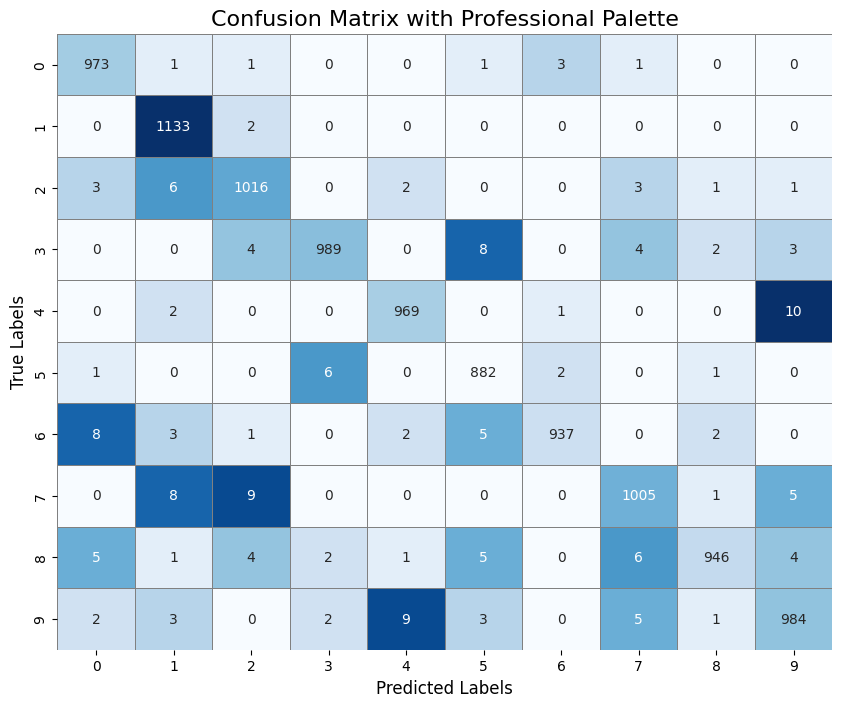

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels,labels=range(10))

# Create a mask for the diagonal elements
mask = np.eye(len(cm), dtype=bool)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap for off-diagonal elements using the mask
# Use a professional color palette like 'Blues'
sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Plot the heatmap for diagonal elements using the inverse of the mask
# Use the same color palette for consistency
sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

# Labels, title and ticks
label_names = [f'{i}' for i in range(10)]
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('True Labels', fontsize=12)
ax.set_title('Confusion Matrix with Professional Palette', fontsize=16)
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)

plt.savefig('model.png', bbox_inches='tight')
plt.show()

In [7]:
predictions.shape

(10000, 10)

In [8]:
# Count the occurrences of each label in the correct_labels
unique, counts = np.unique(predicted_labels, return_counts=True)
predicted_labels_counts = dict(zip(unique, counts))
print("correct_predicted set label counts:", predicted_labels_counts)
for label, count in predicted_labels_counts.items():
    print(f"Label {label}: {count}")

total_predicted_labels_count = len(predicted_labels)

# Display the total count of all labels
print(f"Total count of all total_predicted_labels_count combined in the MNIST dataset: {total_predicted_labels_count}")

correct_predicted set label counts: {0: 992, 1: 1157, 2: 1037, 3: 999, 4: 983, 5: 904, 6: 943, 7: 1024, 8: 954, 9: 1007}
Label 0: 992
Label 1: 1157
Label 2: 1037
Label 3: 999
Label 4: 983
Label 5: 904
Label 6: 943
Label 7: 1024
Label 8: 954
Label 9: 1007
Total count of all total_predicted_labels_count combined in the MNIST dataset: 10000


# **FastGradientMethod**

**Load the saved examples
Choose  attack FGM
Apply without target,with target, muktiple attacks without target and with target**




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


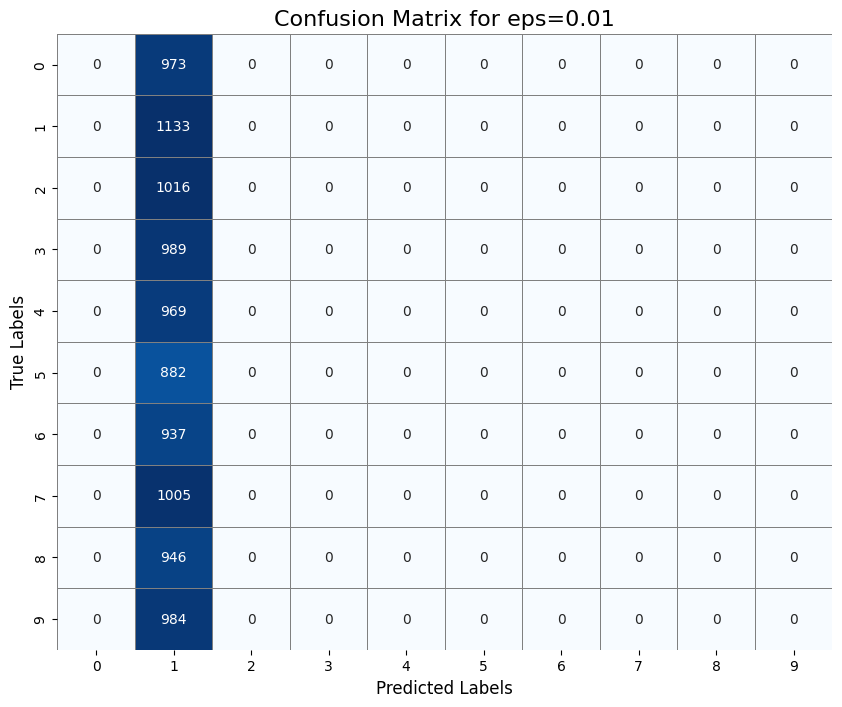

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


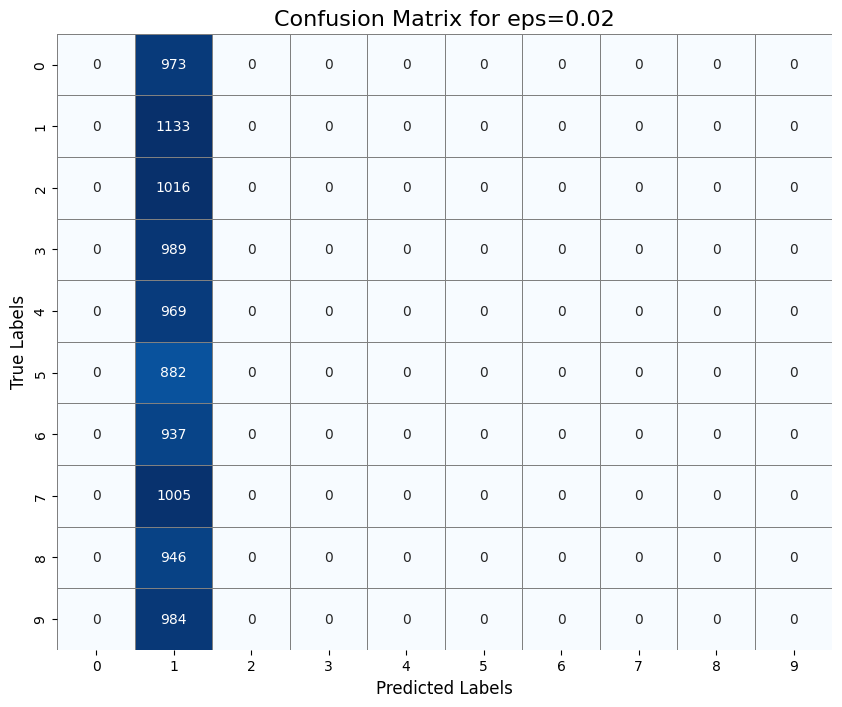

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


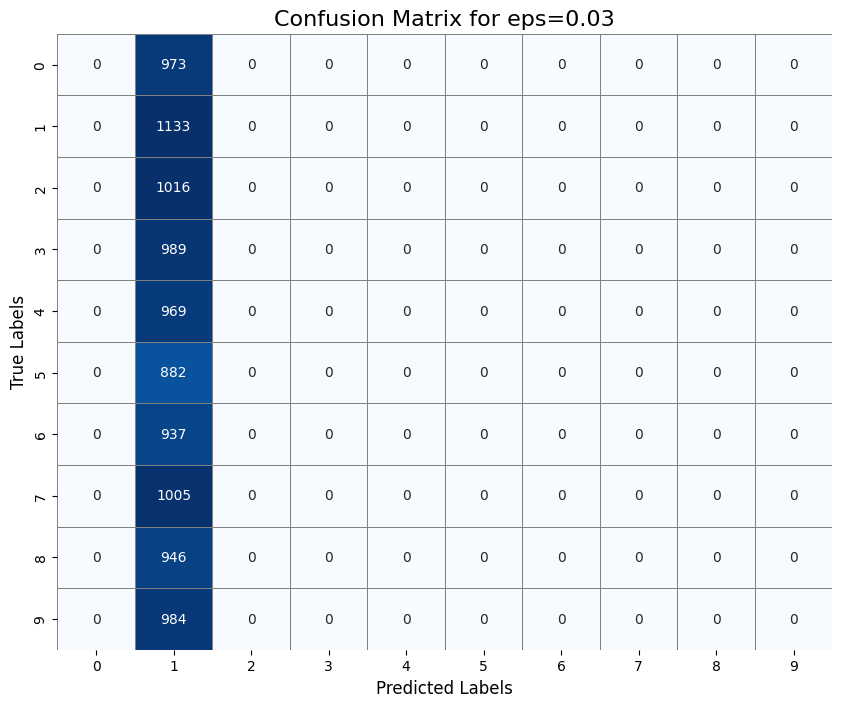

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


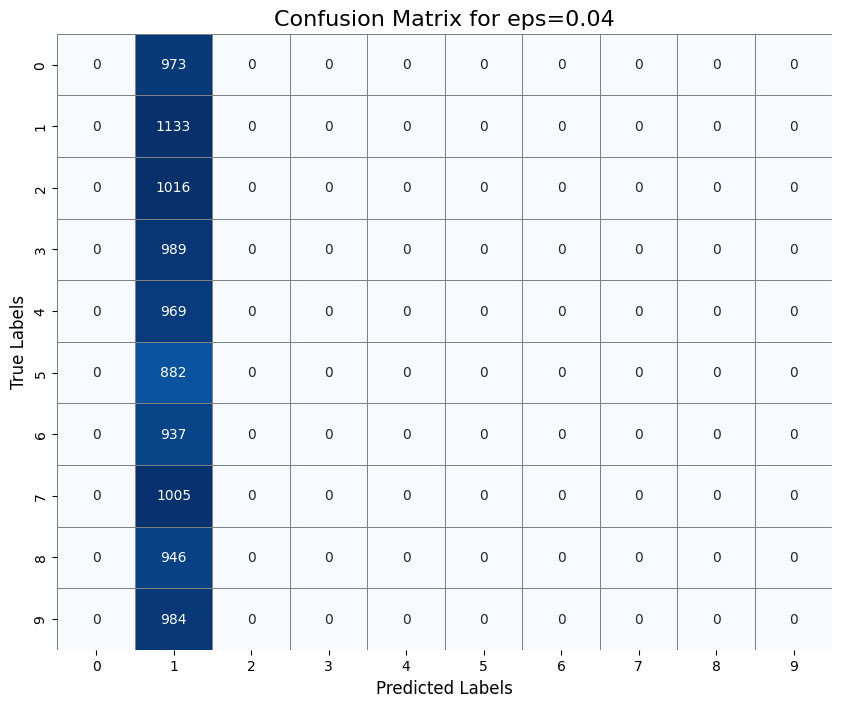

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


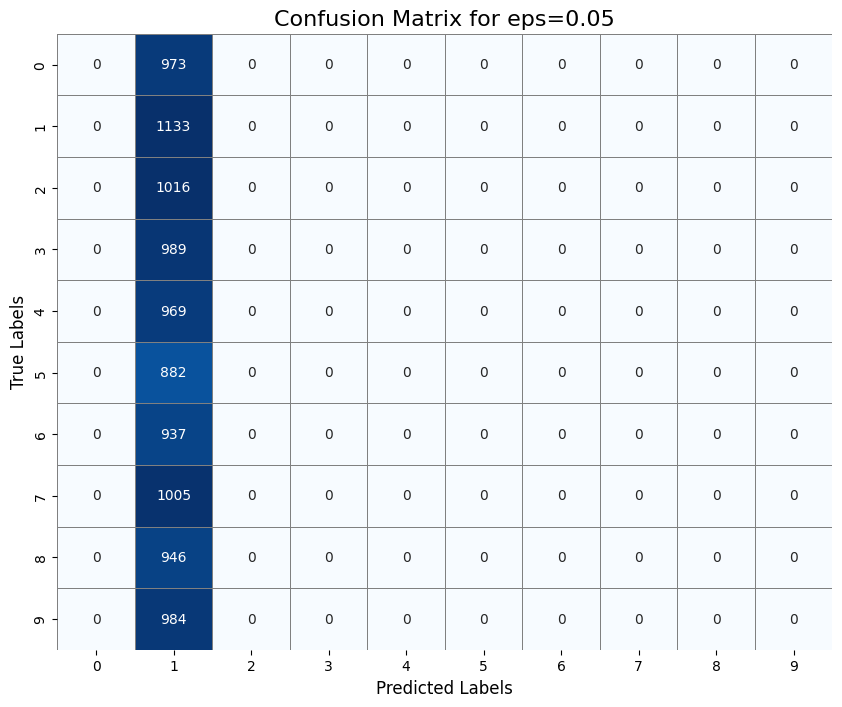

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


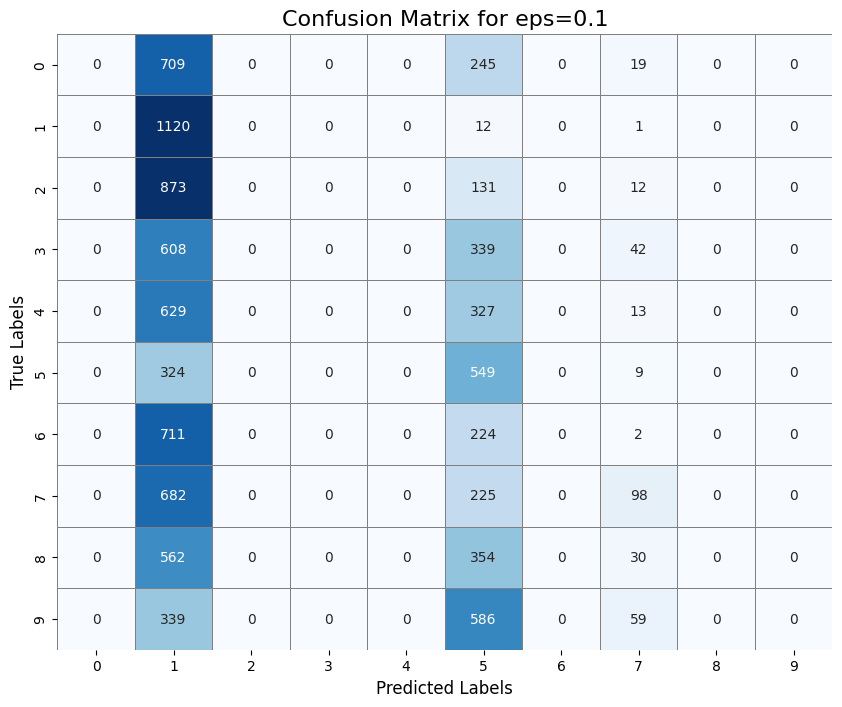

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


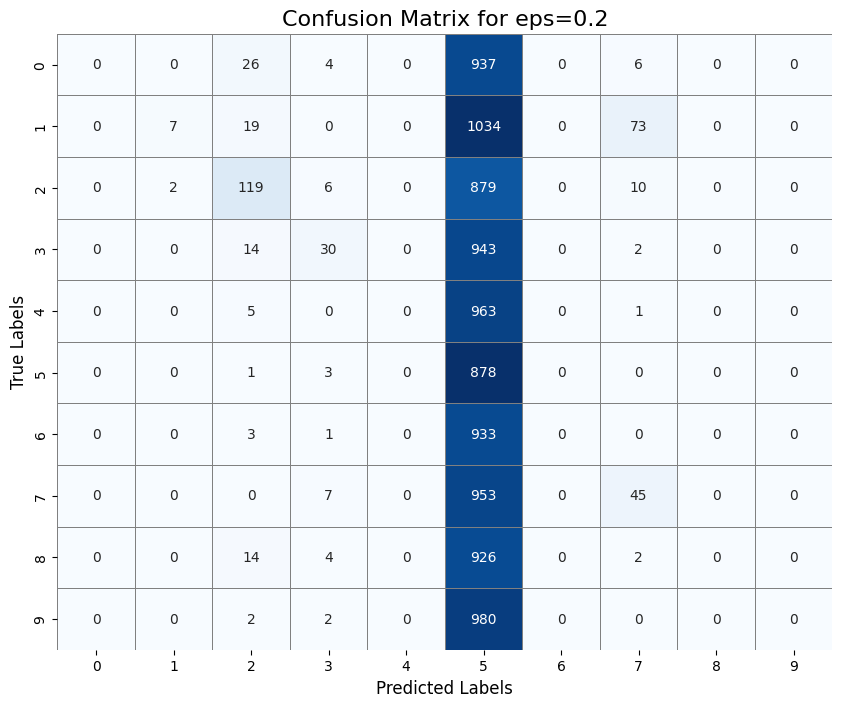

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


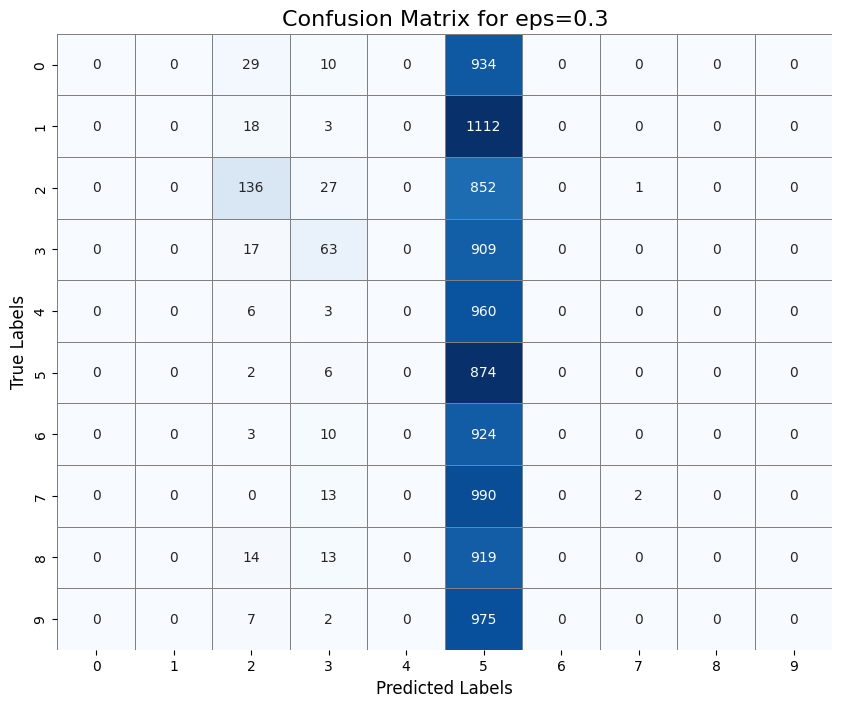

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


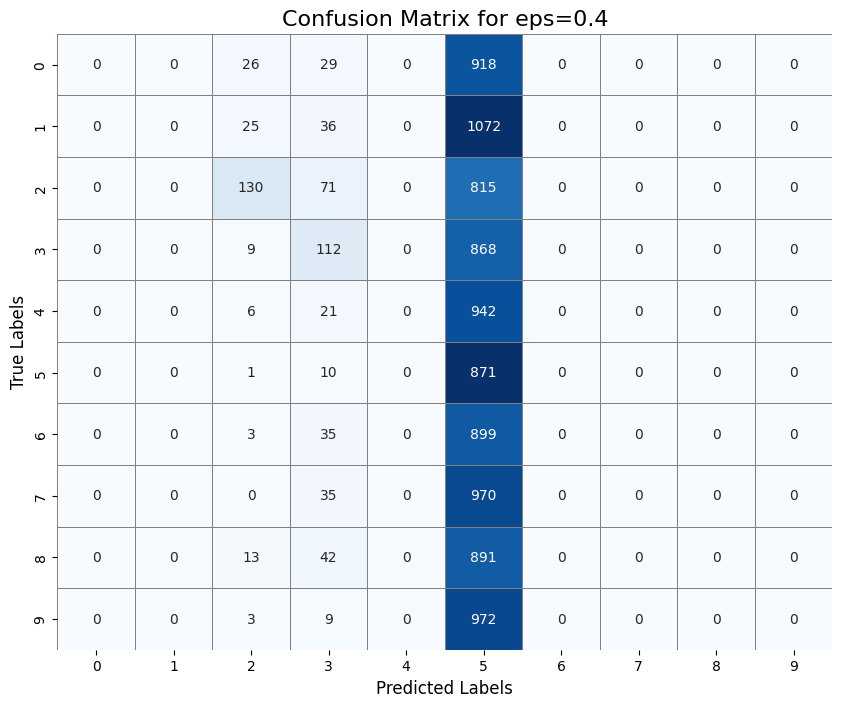

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


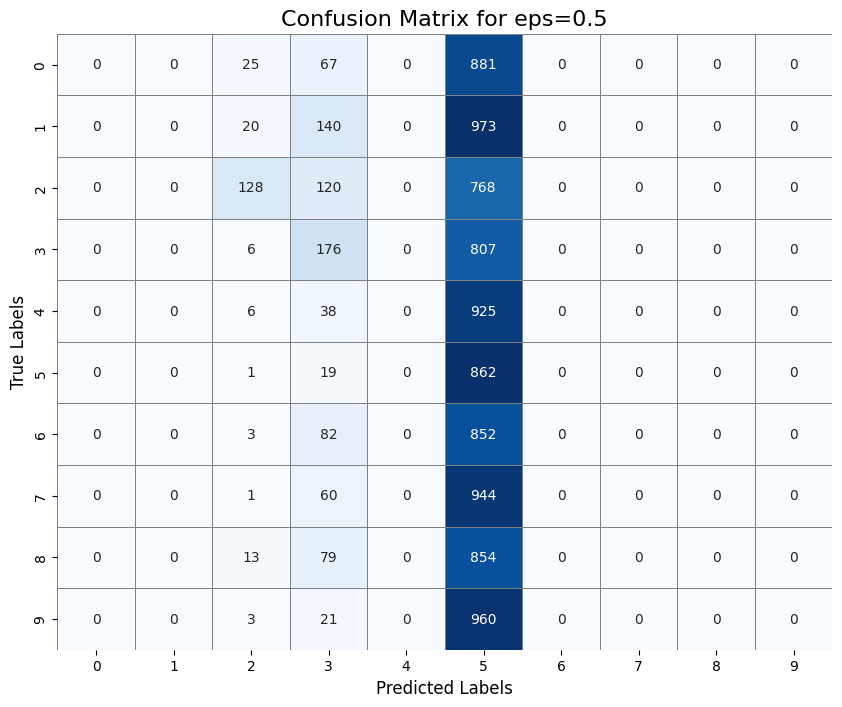

<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


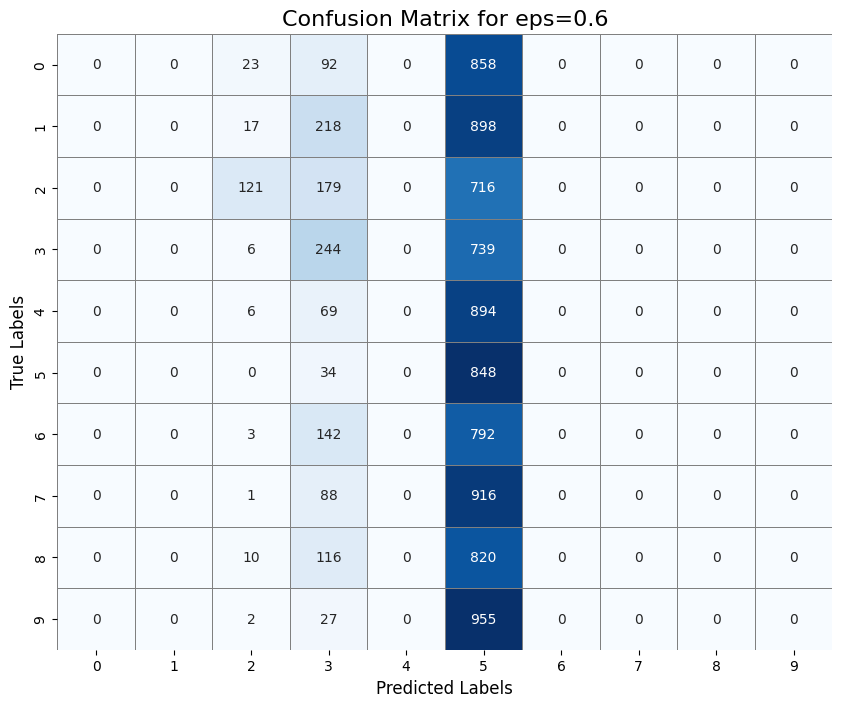

     eps total_correct total_adv                      correct_adv_counts
0   0.01          9834      9834                               {1: 9834}
1   0.02          9834      9834                               {1: 9834}
2   0.03          9834      9834                               {1: 9834}
3   0.04          9834      9834                               {1: 9834}
4   0.05          9834      9834                               {1: 9834}
5   0.10          9834      9834              {1: 6557, 5: 2992, 7: 285}
6   0.20          9834      9834  {1: 9, 2: 203, 3: 57, 5: 9426, 7: 139}
7   0.30          9834      9834         {2: 232, 3: 150, 5: 9449, 7: 3}
8   0.40          9834      9834               {2: 216, 3: 400, 5: 9218}
9   0.50          9834      9834               {2: 206, 3: 802, 5: 8826}
10  0.60          9834      9834              {2: 189, 3: 1209, 5: 8436}


<ipython-input-10-0a0c6a8f54d5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [10]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Disable eager execution (necessary for ART with TensorFlow v1)
tf.compat.v1.disable_eager_execution()

# Load your trained model
model = load_model('/content/drive/MyDrive/ColabNotebooks/mnist_model.h5')

# Load the saved correct examples and their labels
correct_examples = np.load('/content/drive/MyDrive/ColabNotebooks/correct_examples.npy')
correct_labels = np.load('/content/drive/MyDrive/ColabNotebooks/correct_labels.npy')

# Preprocess the examples
correct_examples = correct_examples.astype('float32') / 255

# Wrap the model with ART KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0, 1))

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)

    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

    # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)


    image_filename = f'confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.show()


    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


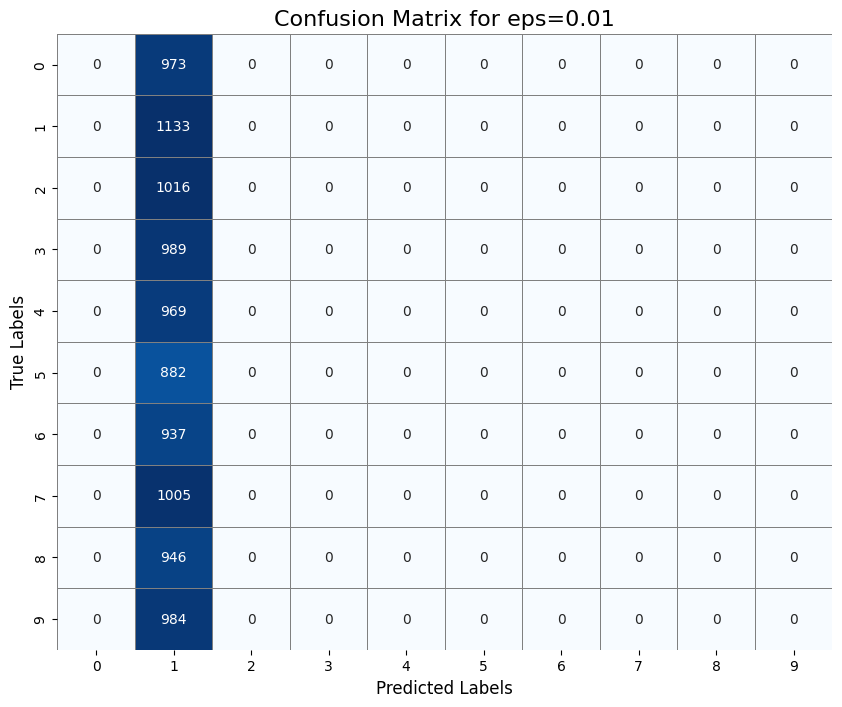

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


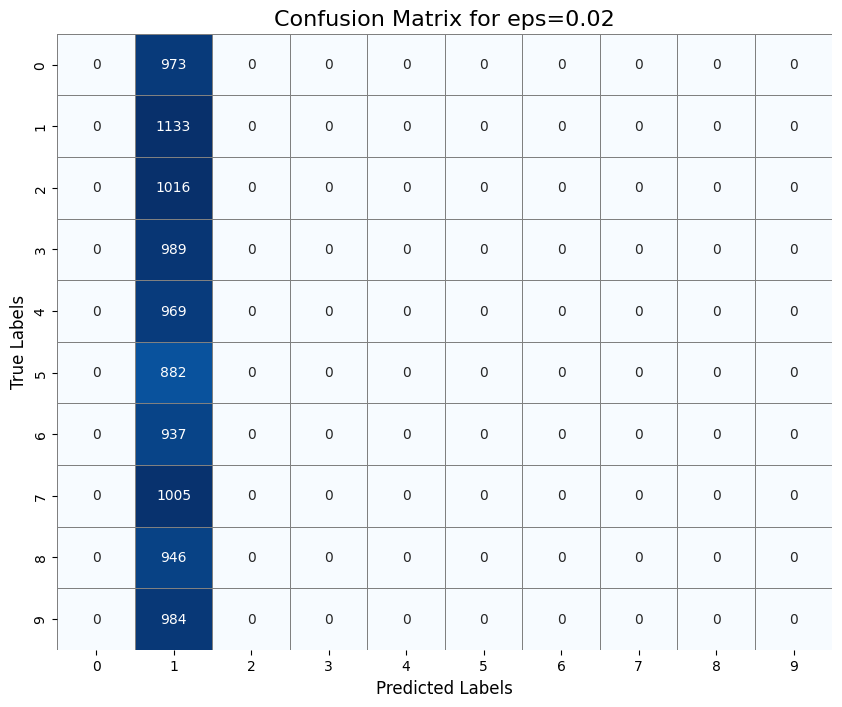

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


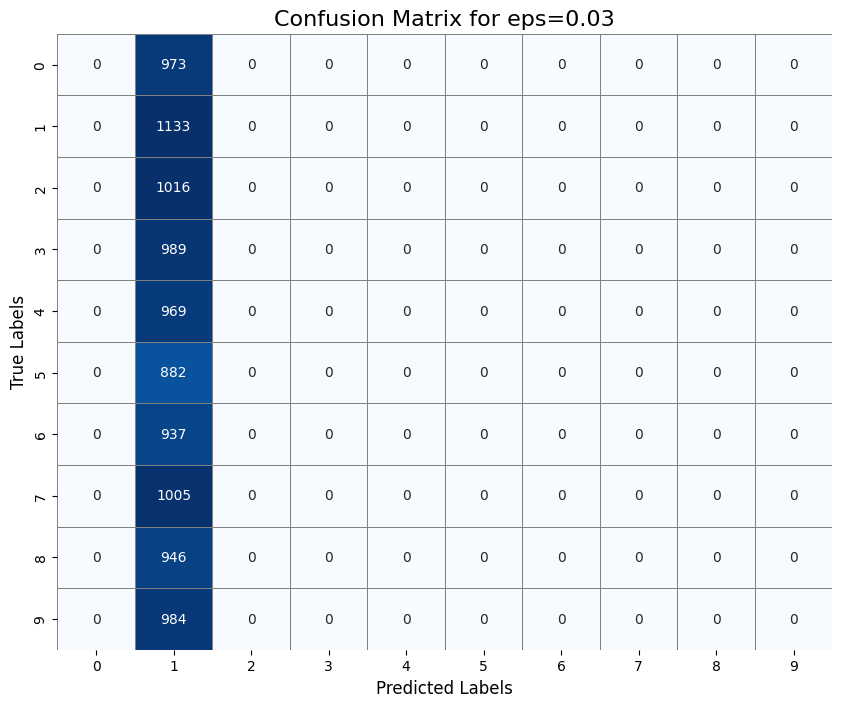

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


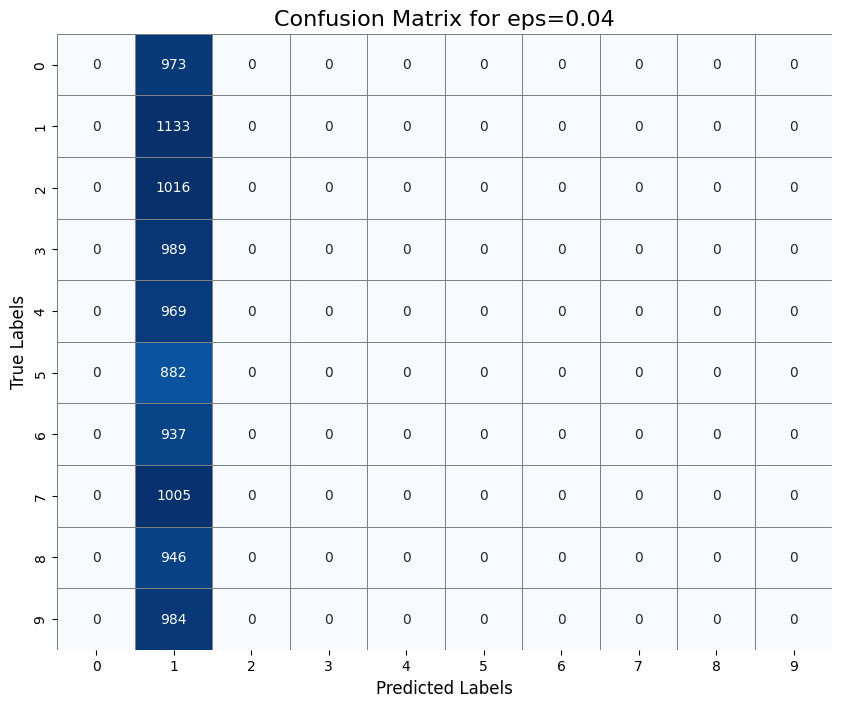

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


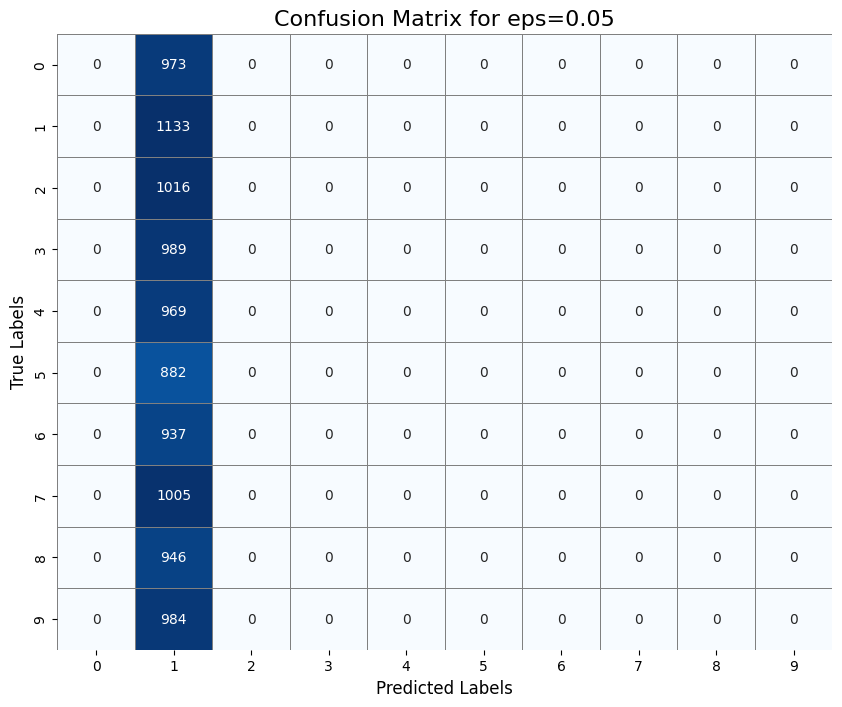

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


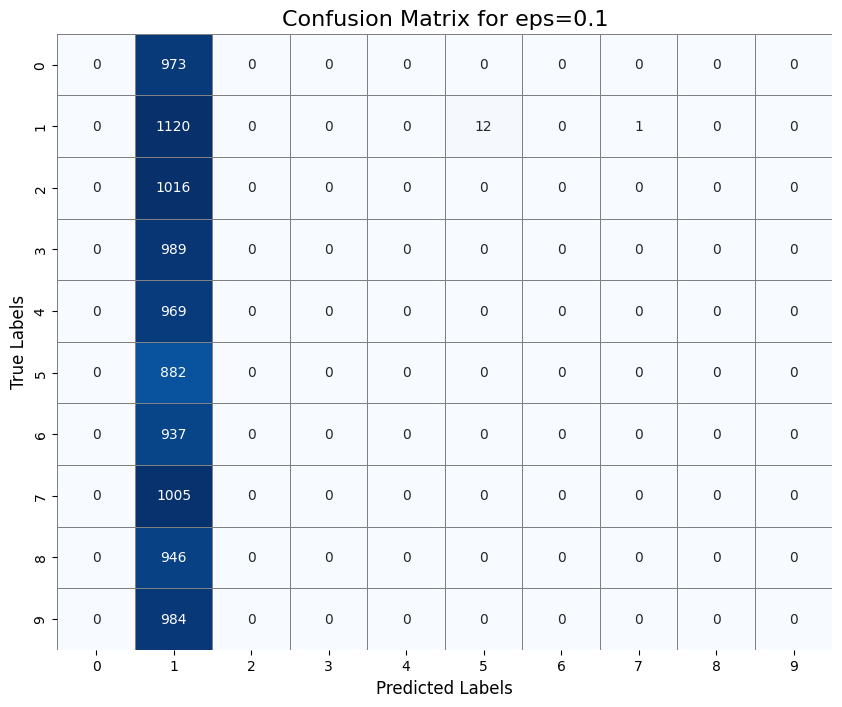

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


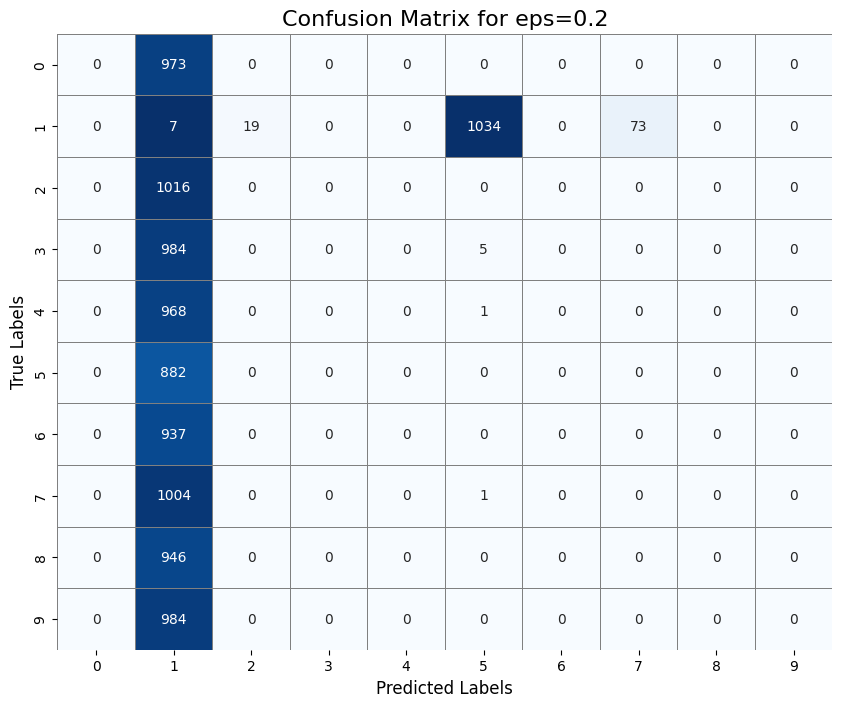

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


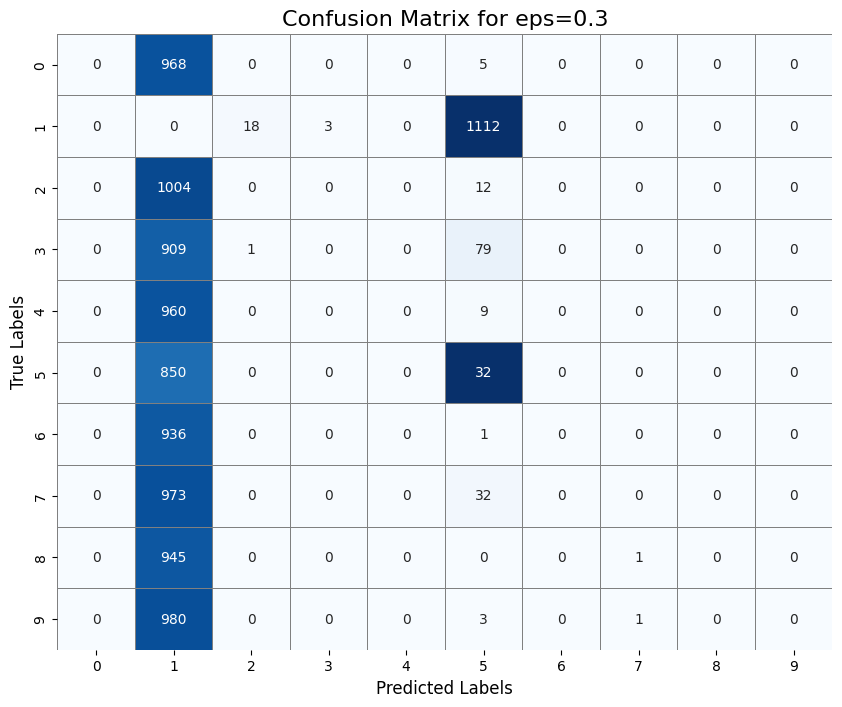

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


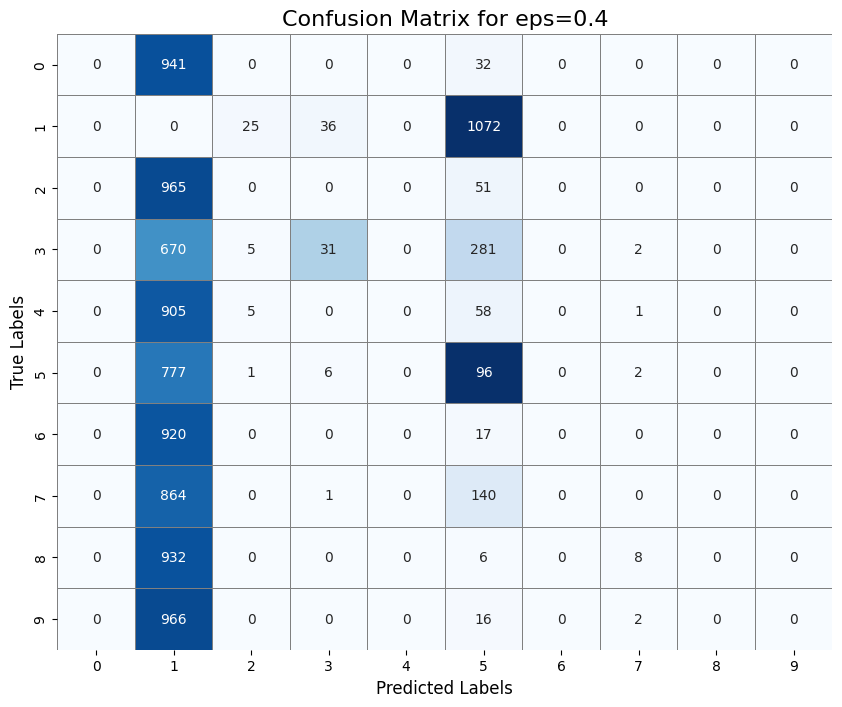

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


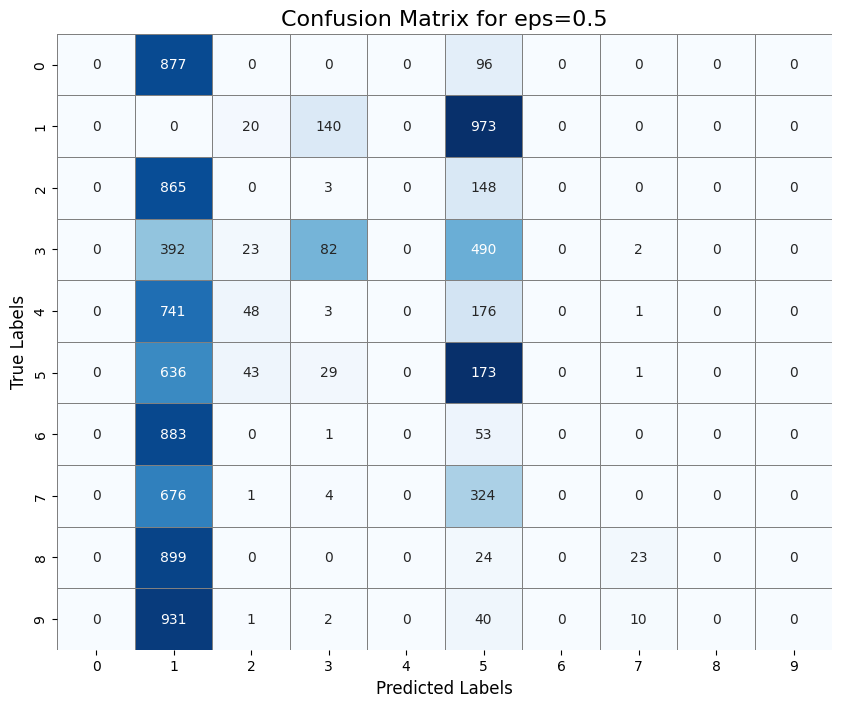

<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


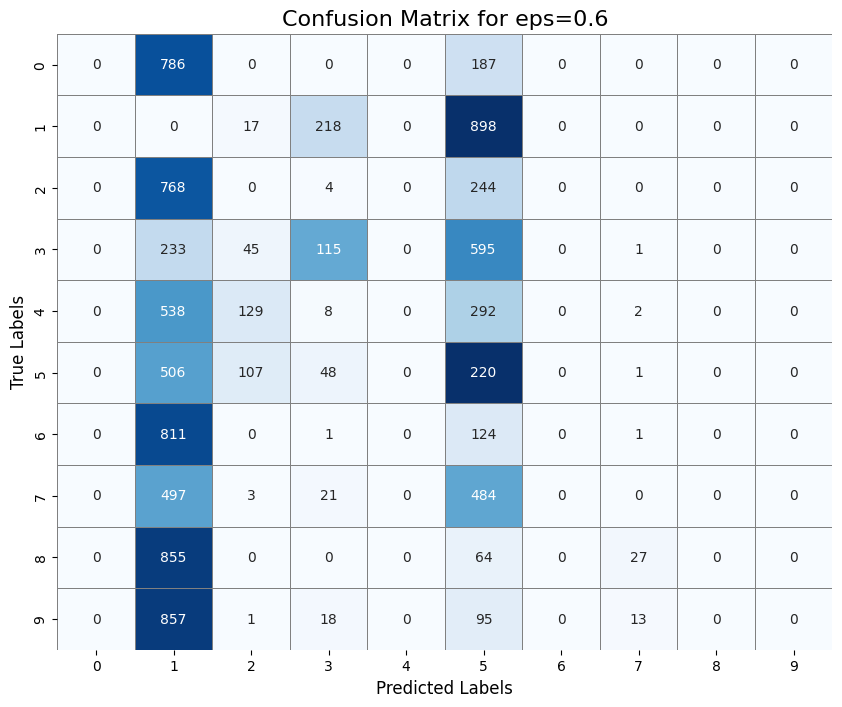

     eps total_correct total_adv                         correct_adv_counts
0   0.01          9834      9834                                  {1: 9834}
1   0.02          9834      9834                                  {1: 9834}
2   0.03          9834      9834                                  {1: 9834}
3   0.04          9834      9834                                  {1: 9834}
4   0.05          9834      9834                                  {1: 9834}
5   0.10          9834      9834                     {1: 9821, 5: 12, 7: 1}
6   0.20          9834      9834           {1: 8701, 2: 19, 5: 1041, 7: 73}
7   0.30          9834      9834      {1: 8525, 2: 19, 3: 3, 5: 1285, 7: 2}
8   0.40          9834      9834    {1: 7940, 2: 36, 3: 74, 5: 1769, 7: 15}
9   0.50          9834      9834  {1: 6900, 2: 136, 3: 264, 5: 2497, 7: 37}
10  0.60          9834      9834  {1: 5851, 2: 302, 3: 433, 5: 3203, 7: 45}


<ipython-input-11-4df587b5e3b3>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [11]:


# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['eps', 'total_correct', 'total_adv', 'correct_adv_counts'])

# Loop over the eps values
for eps in eps_range:
    # Define the attack with the current eps
    attack = FastGradientMethod(classifier, eps=eps)

    # Apply the attack to generate adversarial examples
    x_adv = attack.generate(x=correct_examples ,y=correct_labels)

    # Predict the labels of the adversarial examples
    y_adv = np.argmax(classifier.predict(x_adv), axis=1)

    # Count the occurrences of each label in the adversarial predictions
    unique_adv, counts_adv = np.unique(y_adv, return_counts=True)
    adv_counts = dict(zip(unique_adv, counts_adv))

    # Calculate the confusion matrix
    cm = confusion_matrix(correct_labels, y_adv, labels=range(10))

   # Draw and save the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create a mask for the diagonal elements
    mask = np.eye(len(cm), dtype=bool)

    # Plot the heatmap for off-diagonal elements using the mask
    # Use a professional color palette like 'Blues'
    sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')

    # Plot the heatmap for diagonal elements using the inverse of the mask
    # Use the same color palette for consistency
    sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
    # Labels, title and ticks
    label_names = [f'{i}' for i in range(10)]
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)
    image_filename = f'_correct_labels_confusion_matrix_eps_{eps}.png'
    plt.savefig(image_filename, bbox_inches='tight')
    plt.show()

    # Save the results in the DataFrame
    results_df = results_df.append({
        'eps': eps,
        'total_correct': len(correct_labels),
        'total_adv': len(y_adv),
        'correct_adv_counts': adv_counts
    }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results_labels.csv', index=False)

# Print the DataFrame
print(results_df)


In [14]:

# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.show()  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)


Output hidden; open in https://colab.research.google.com to view.

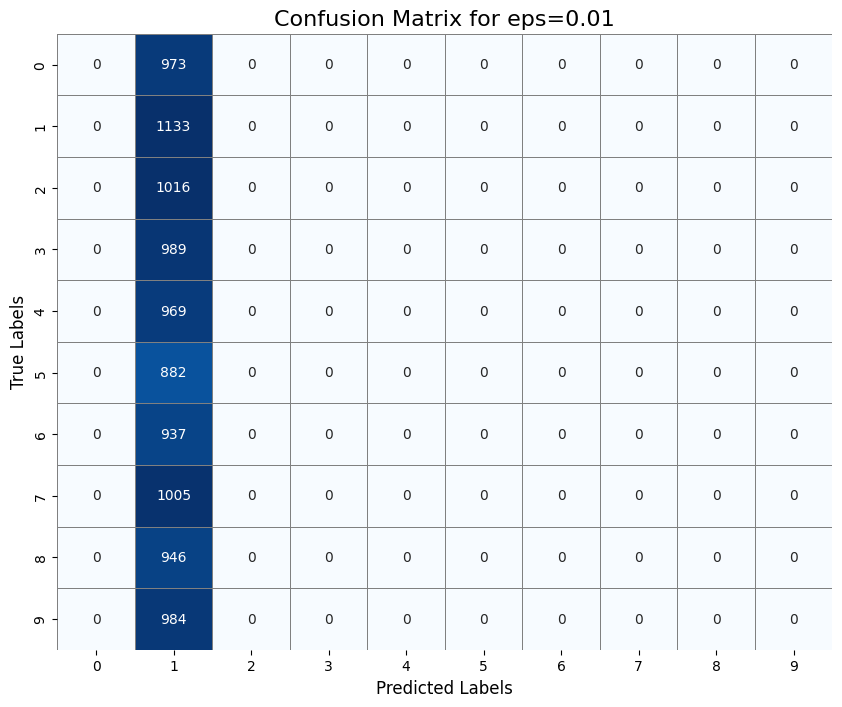

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


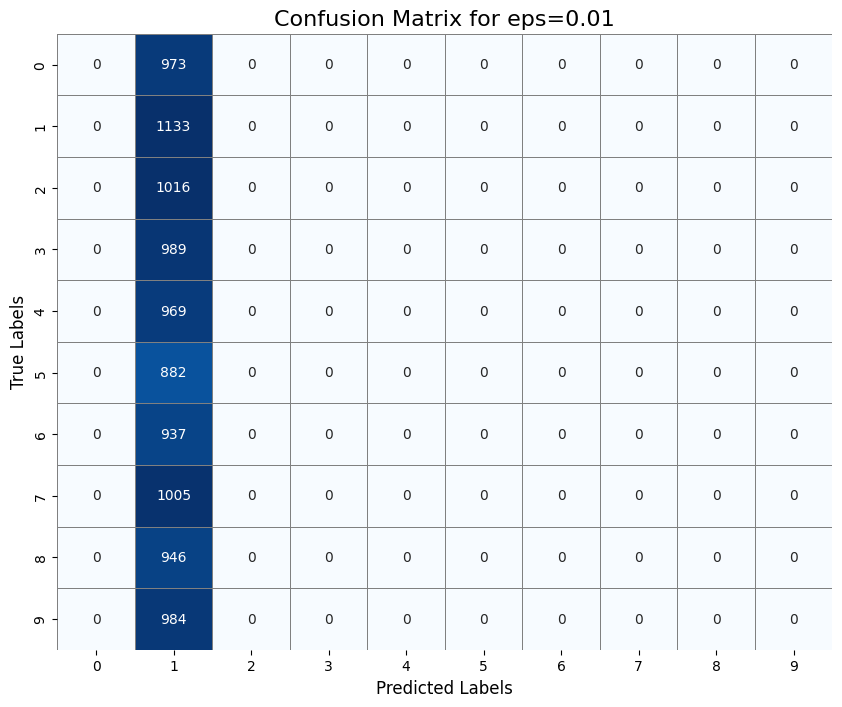

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


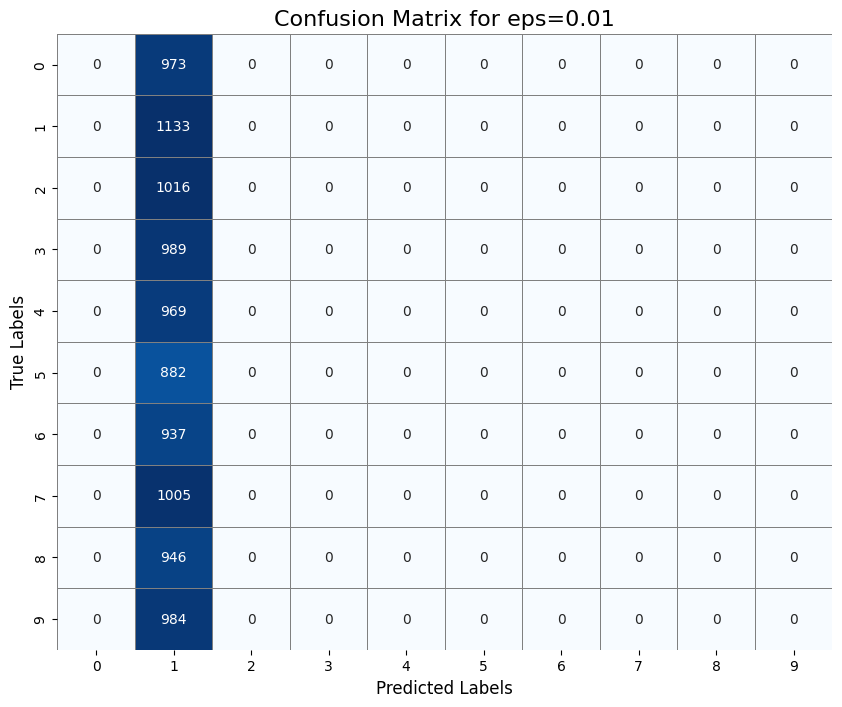

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


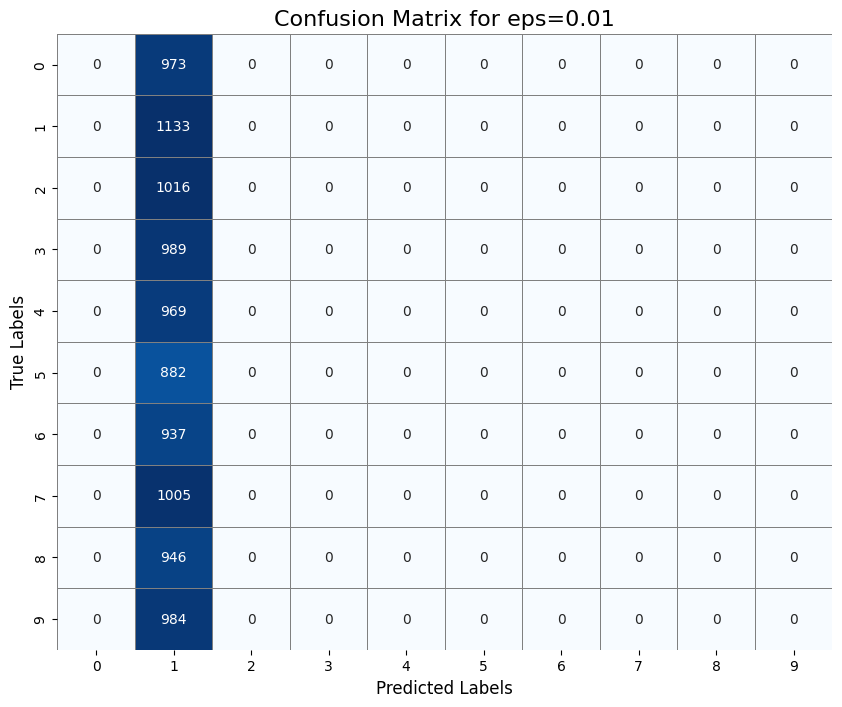

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


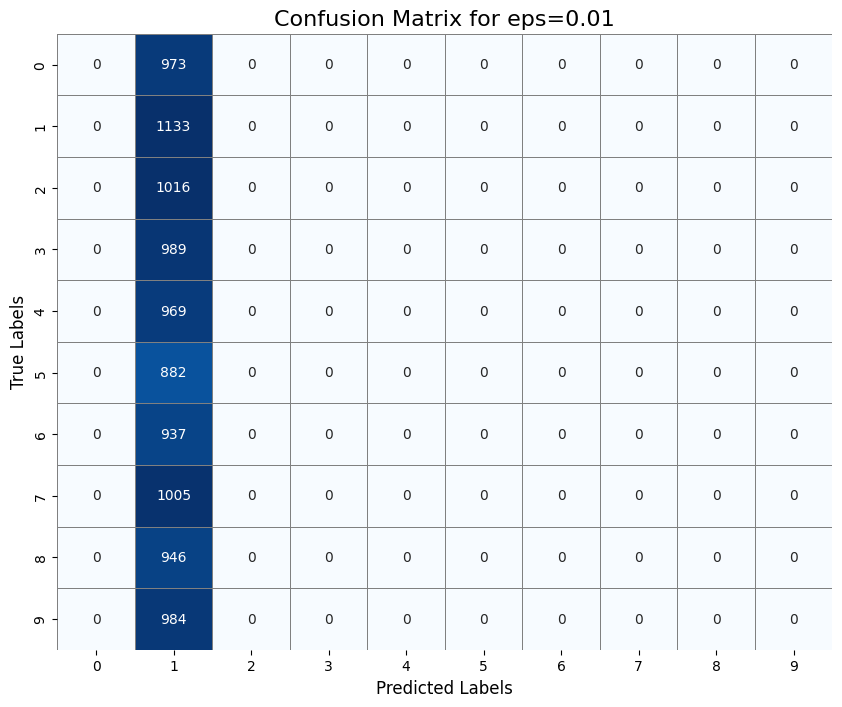

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


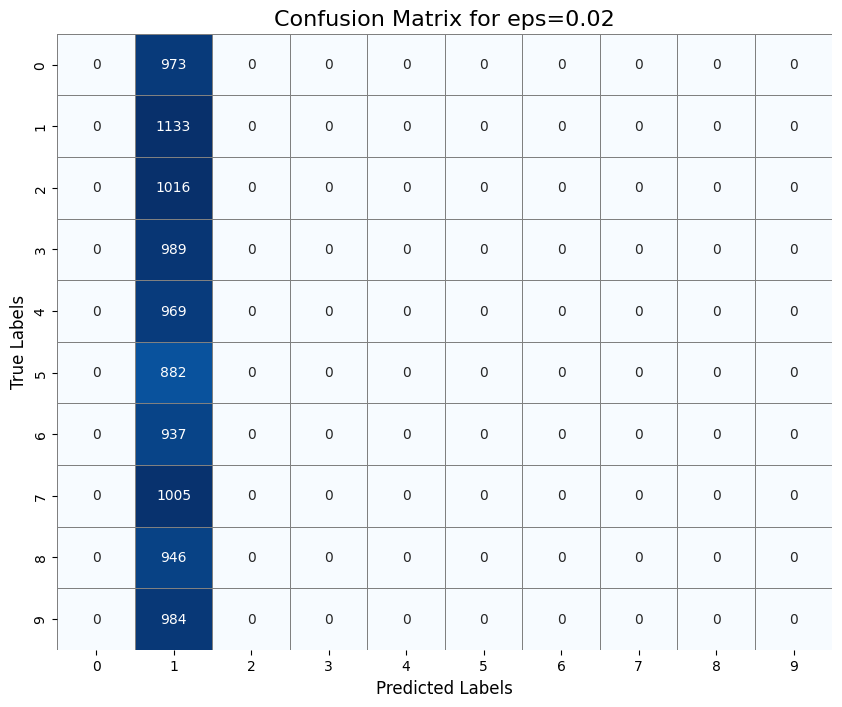

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


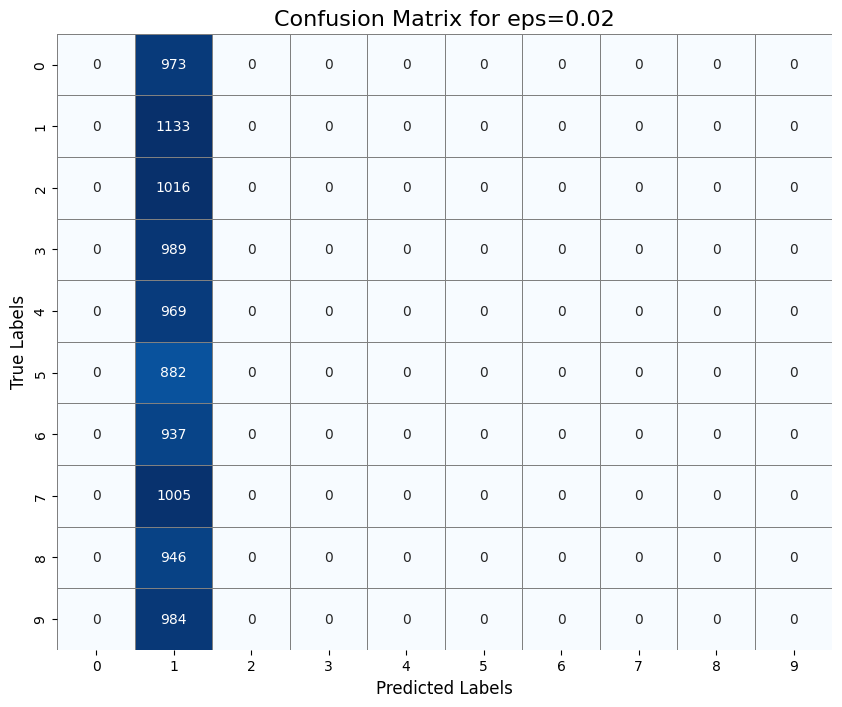

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


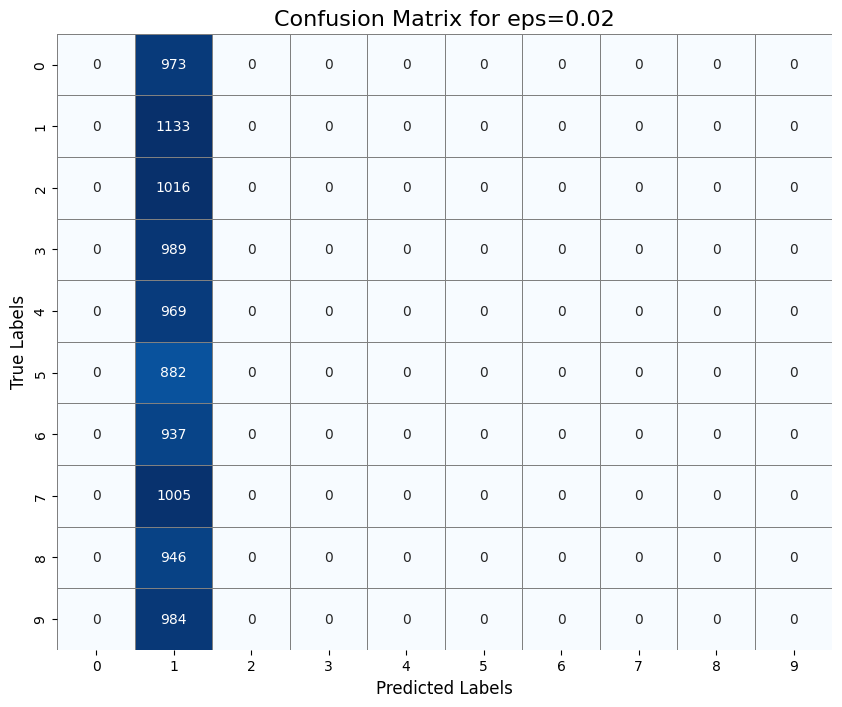

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


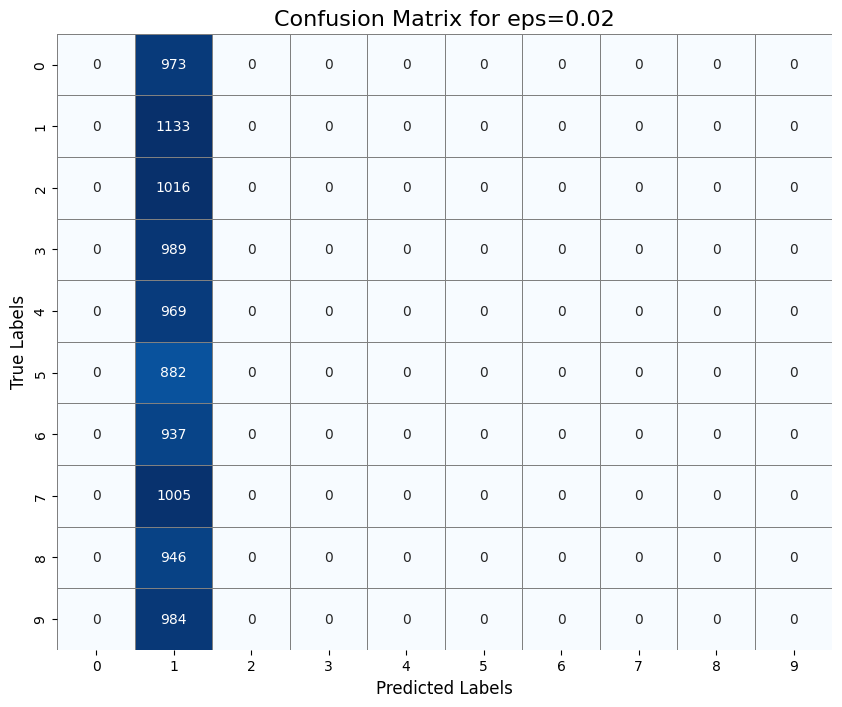

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


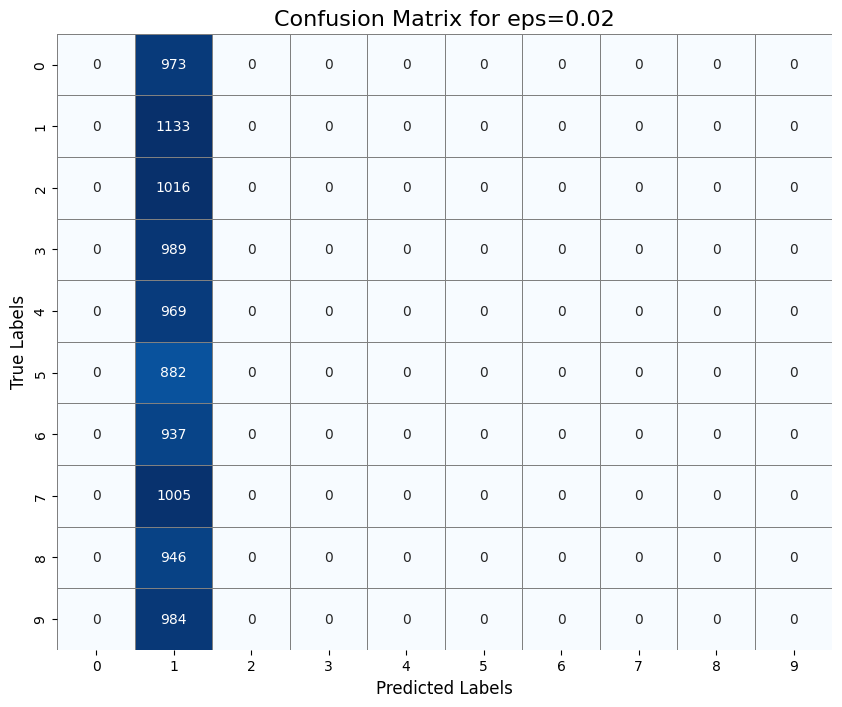

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


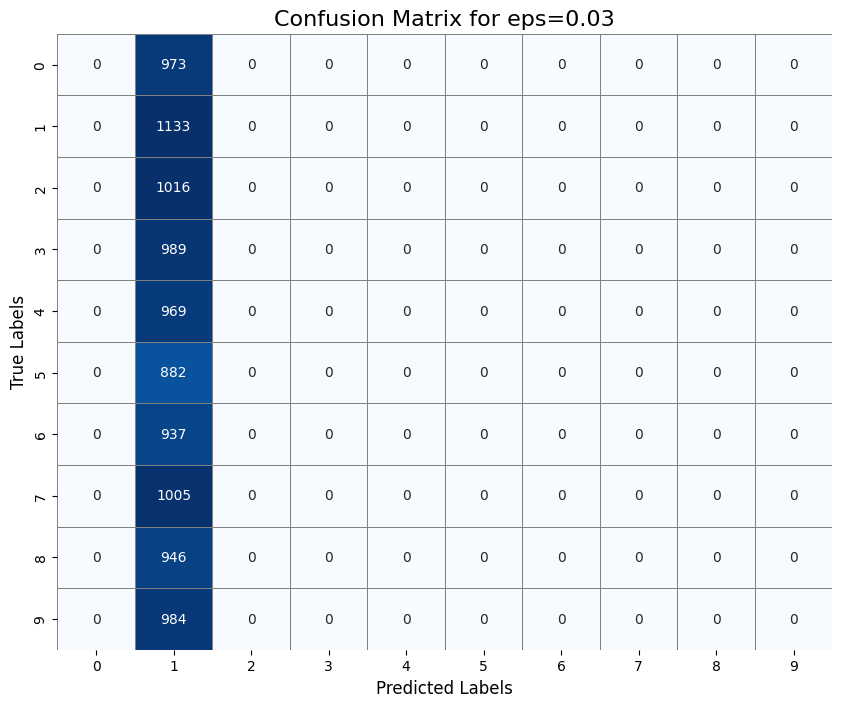

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


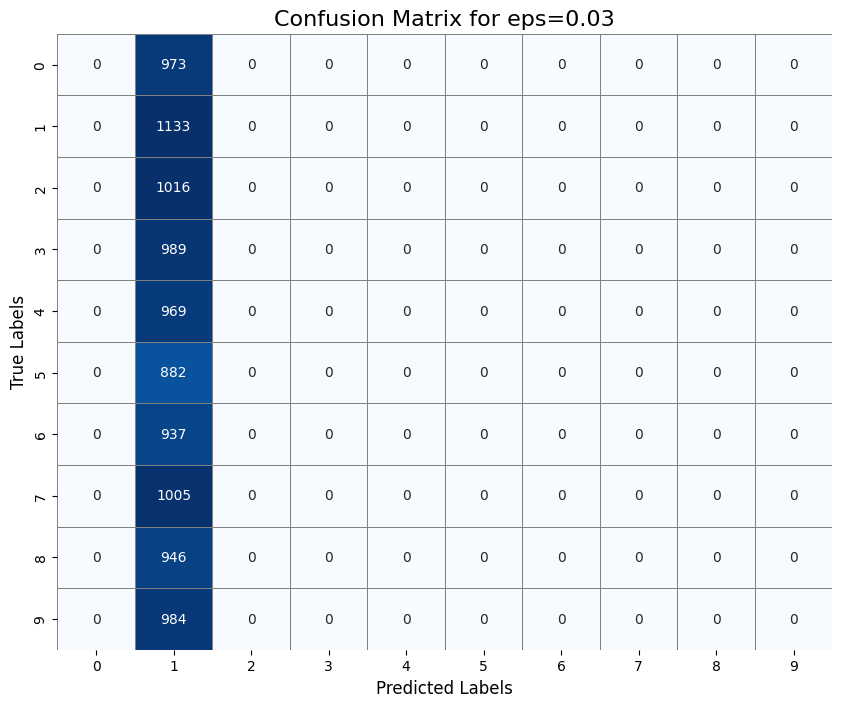

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


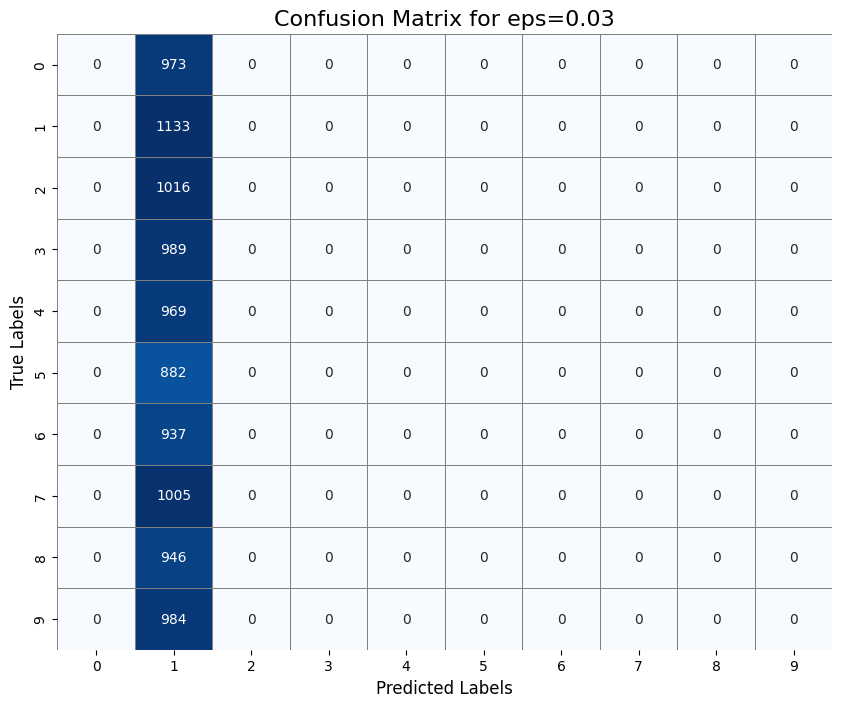

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


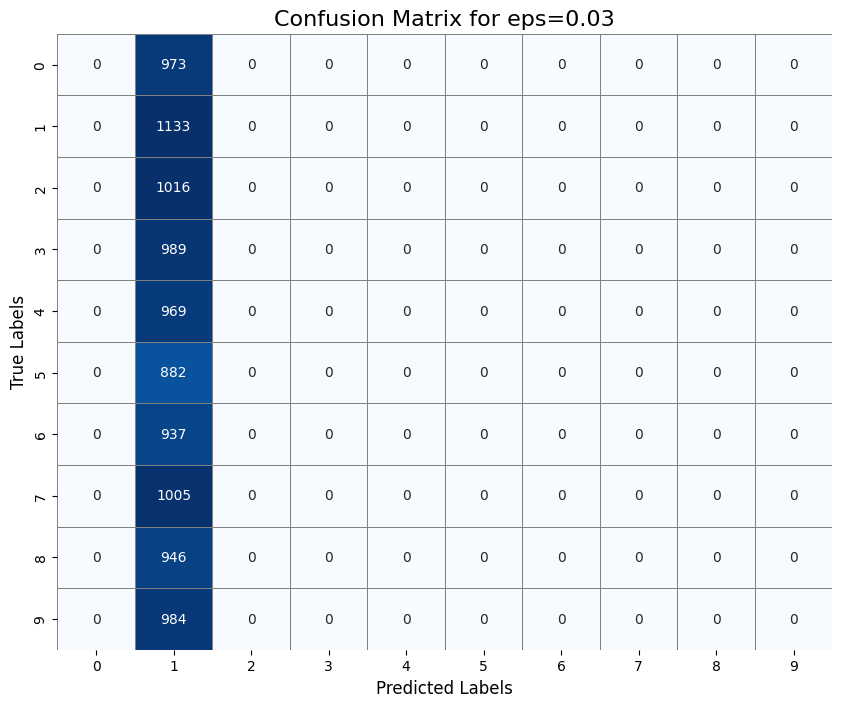

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


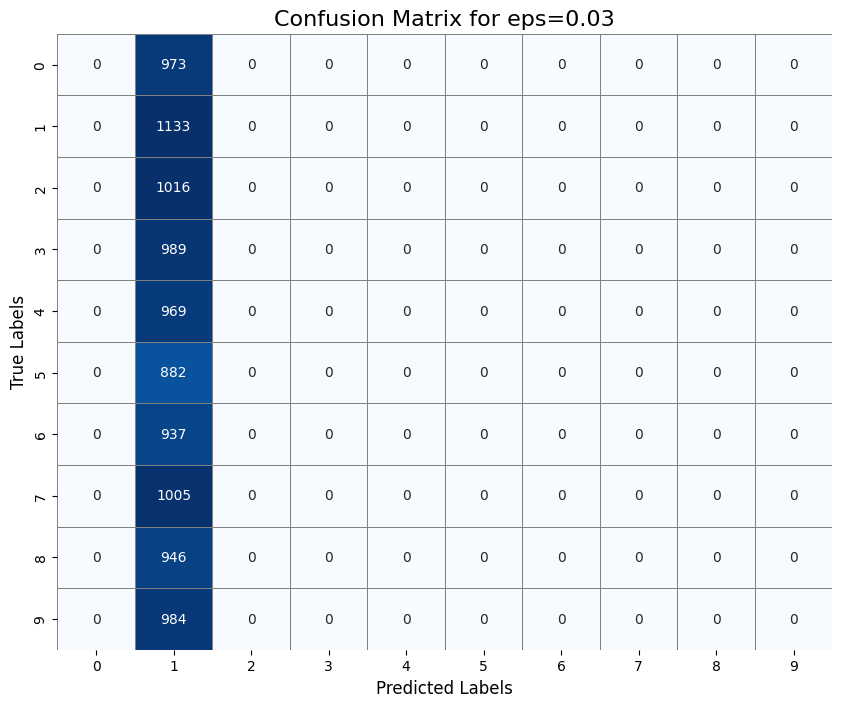

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


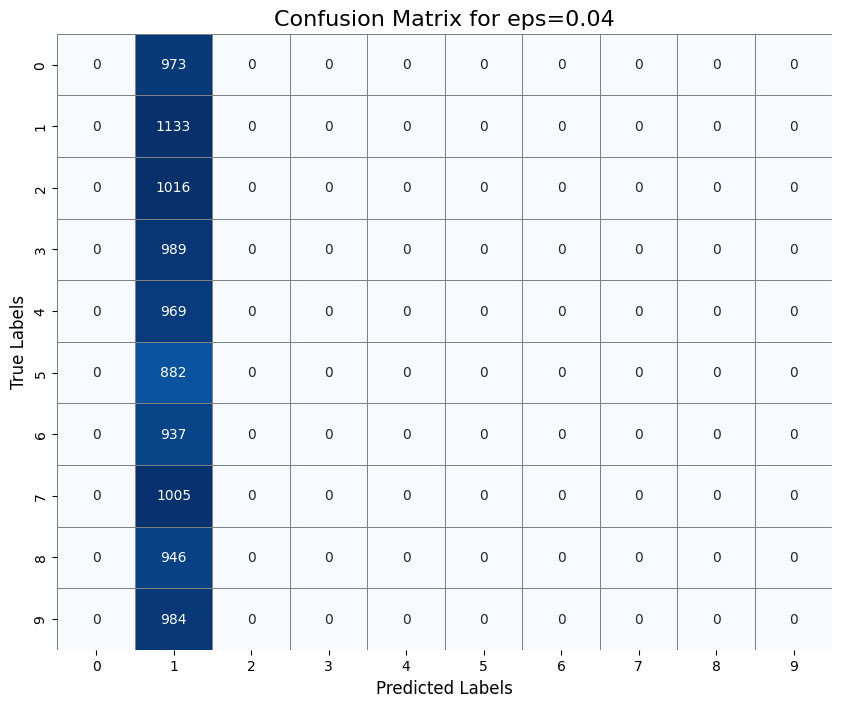

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


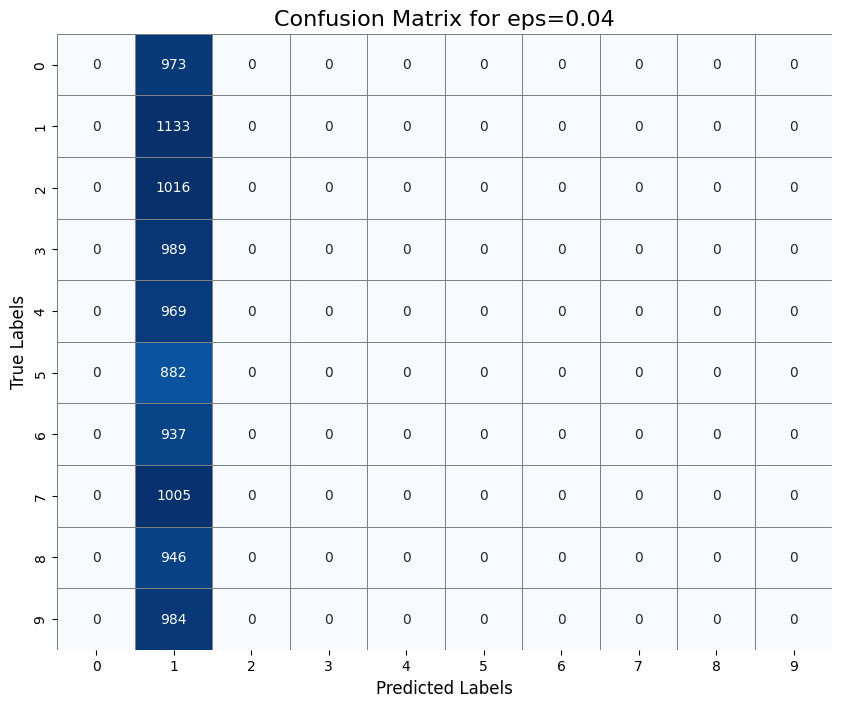

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


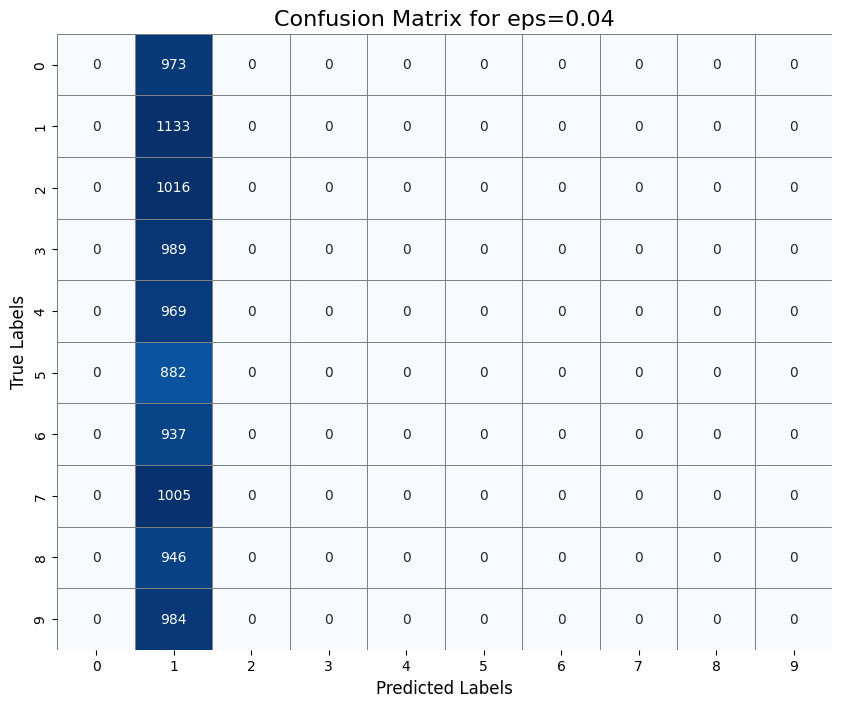

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


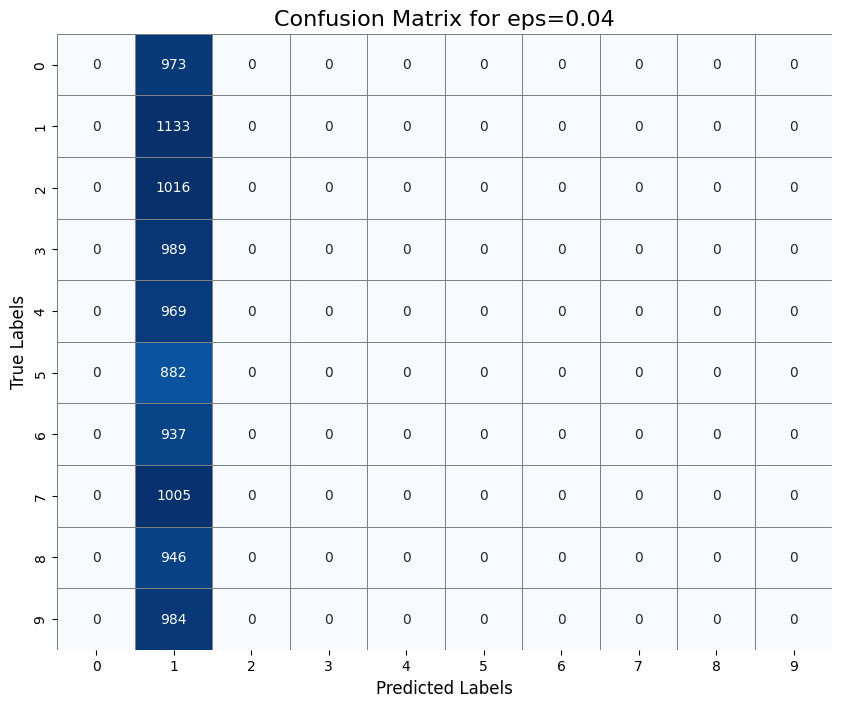

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


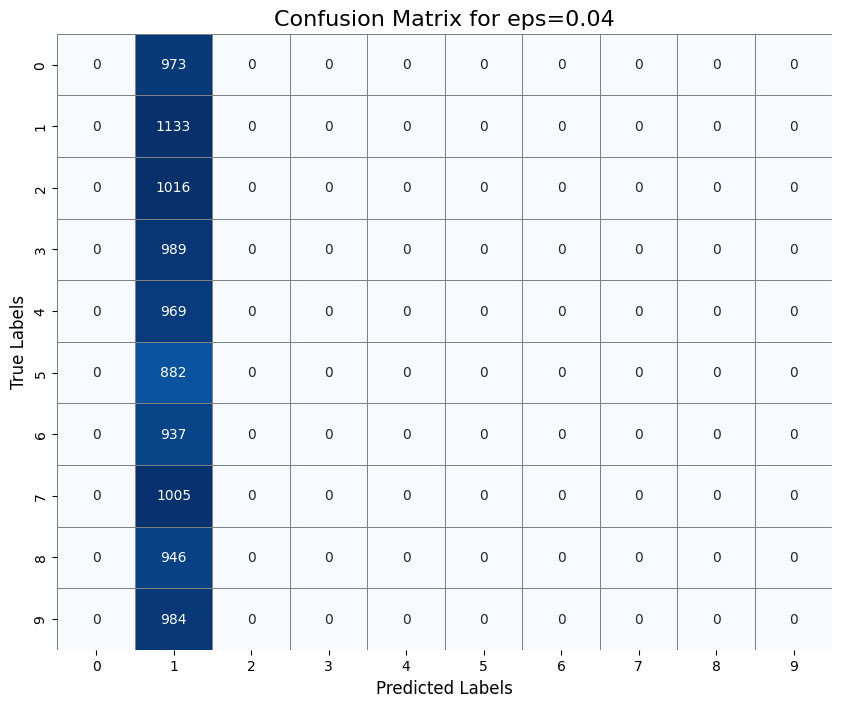

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


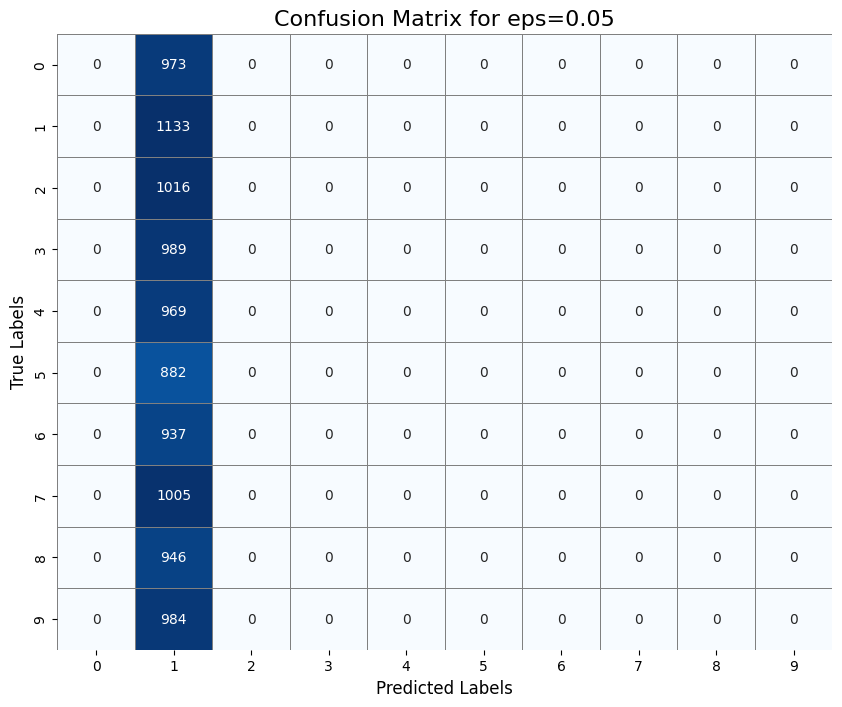

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


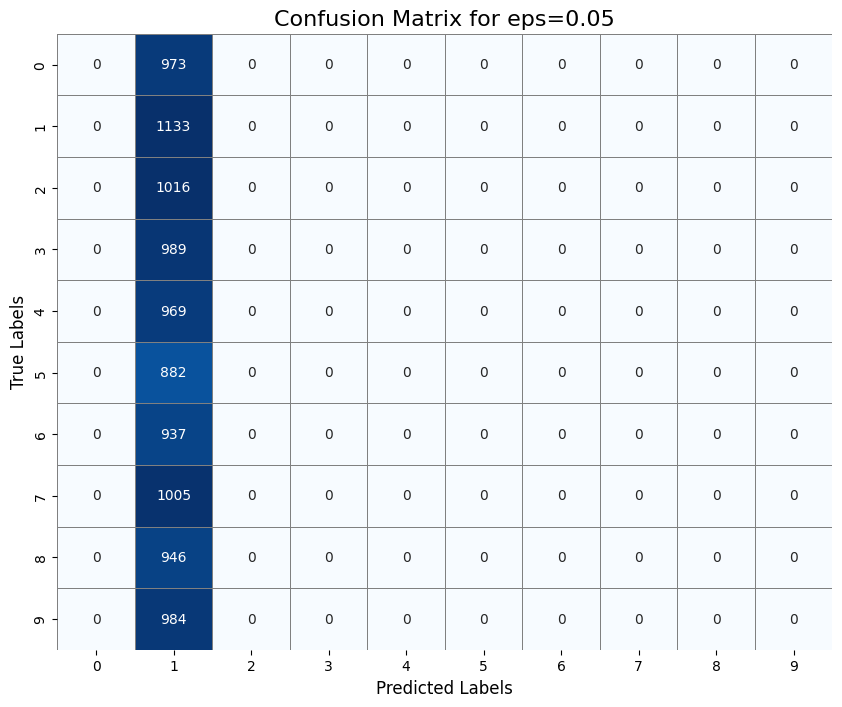

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


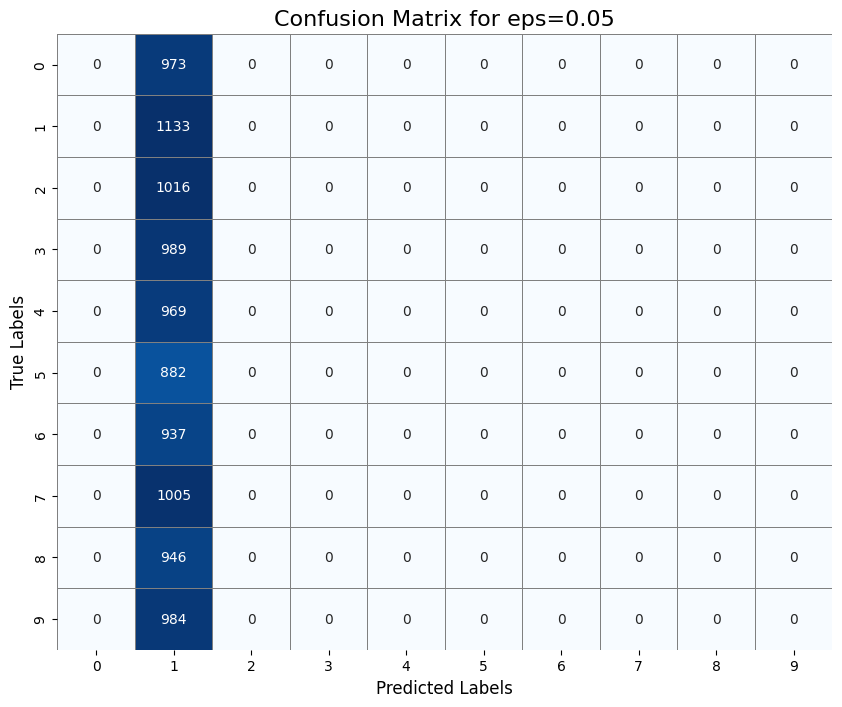

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


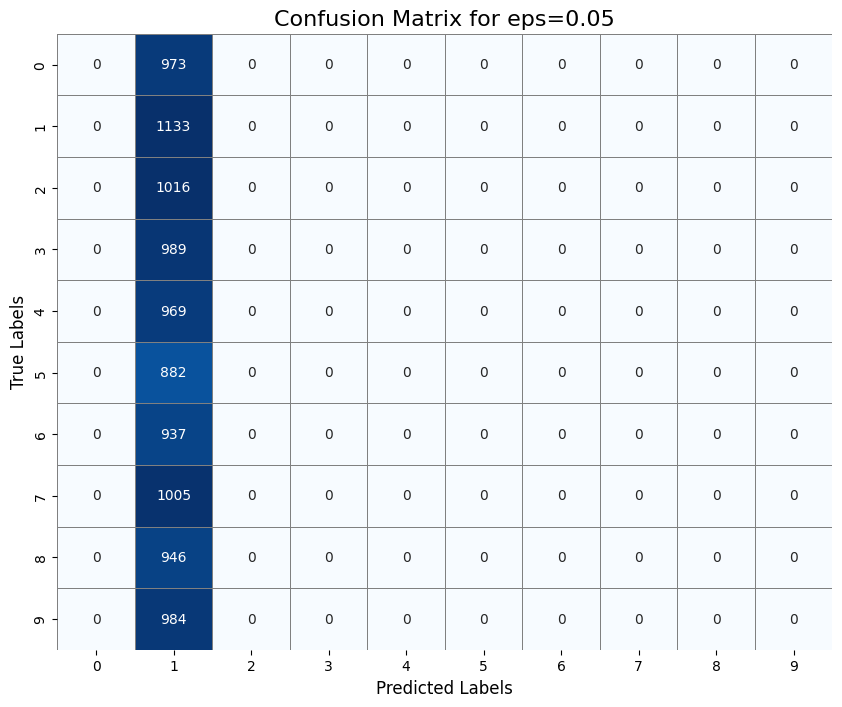

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


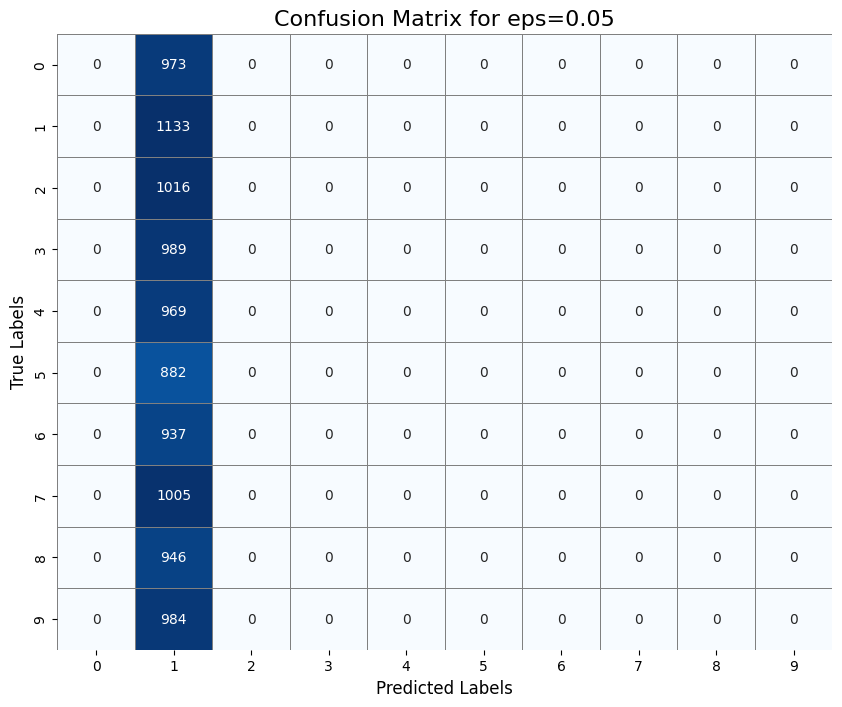

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


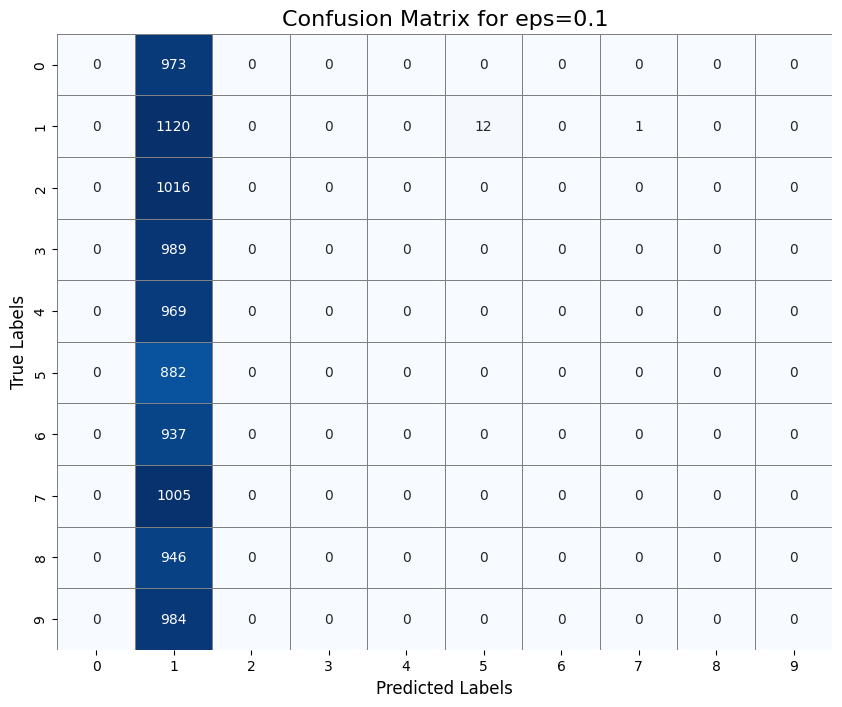

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


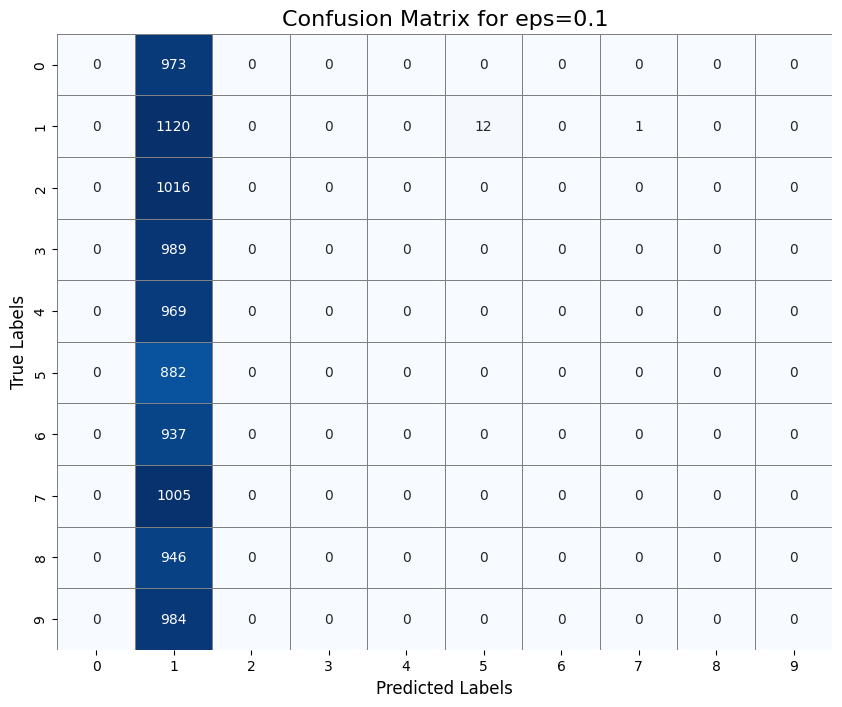

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


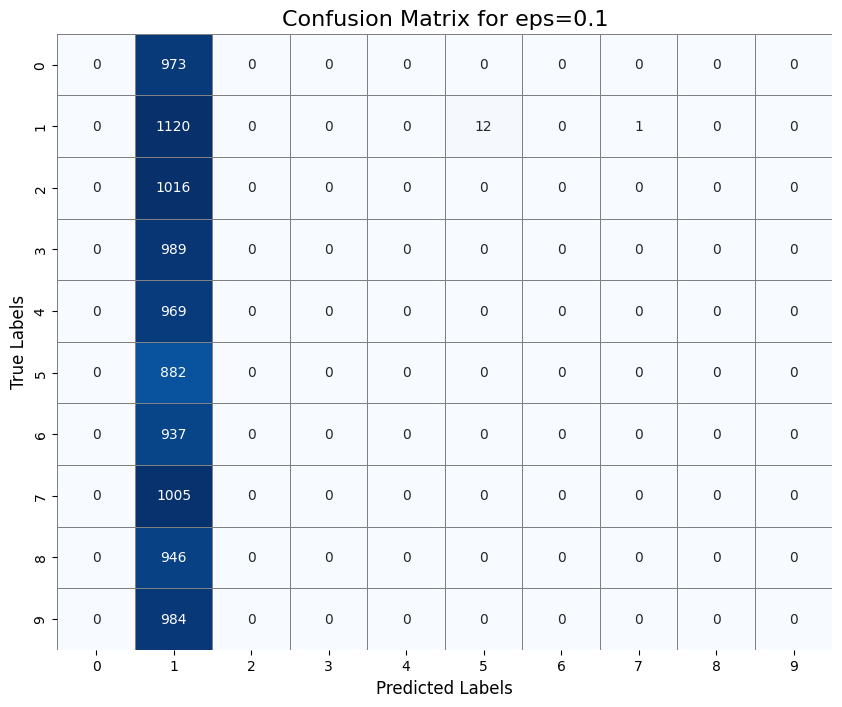

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


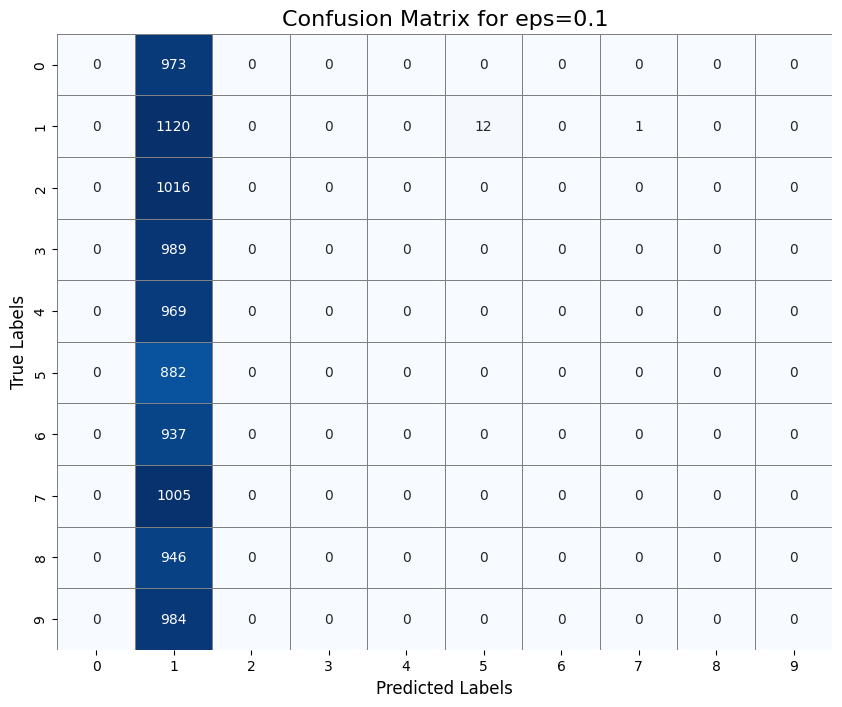

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


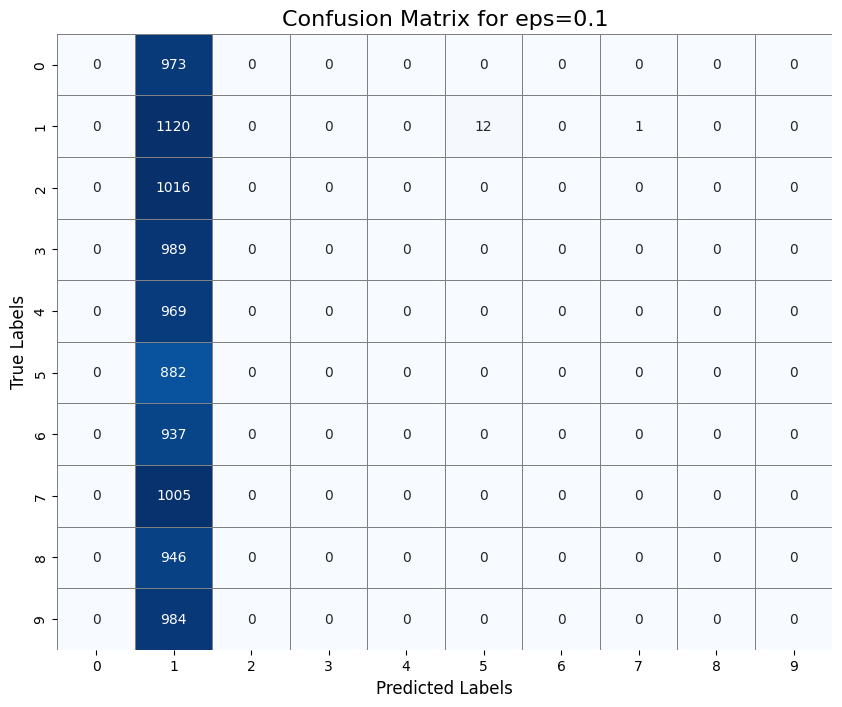

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


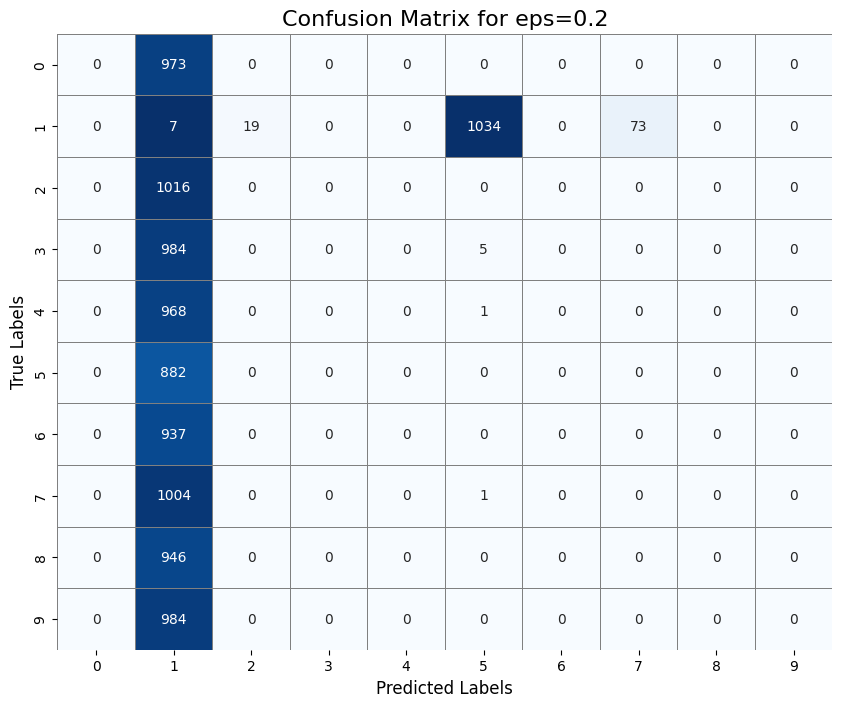

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


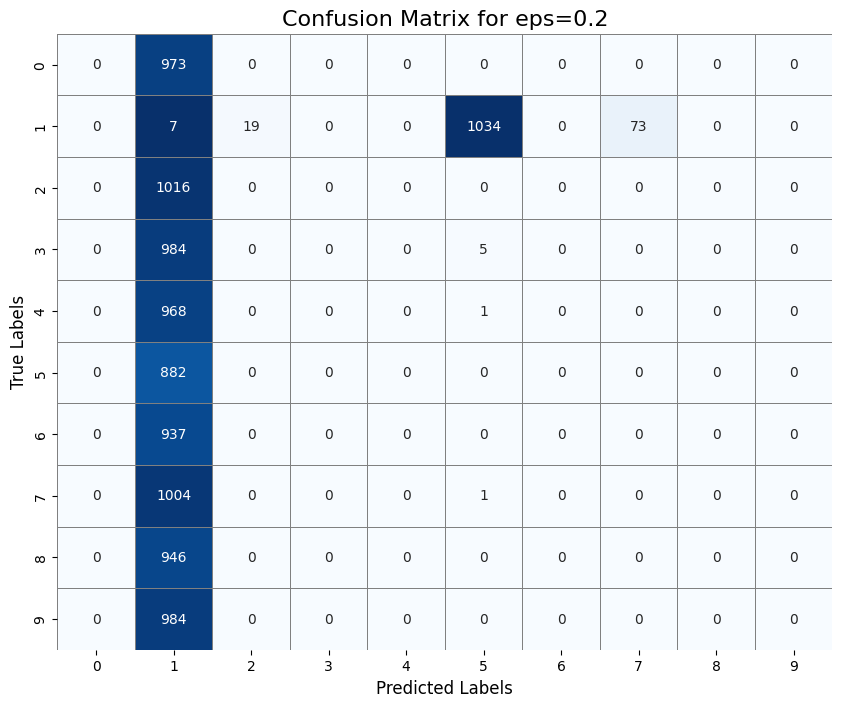

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


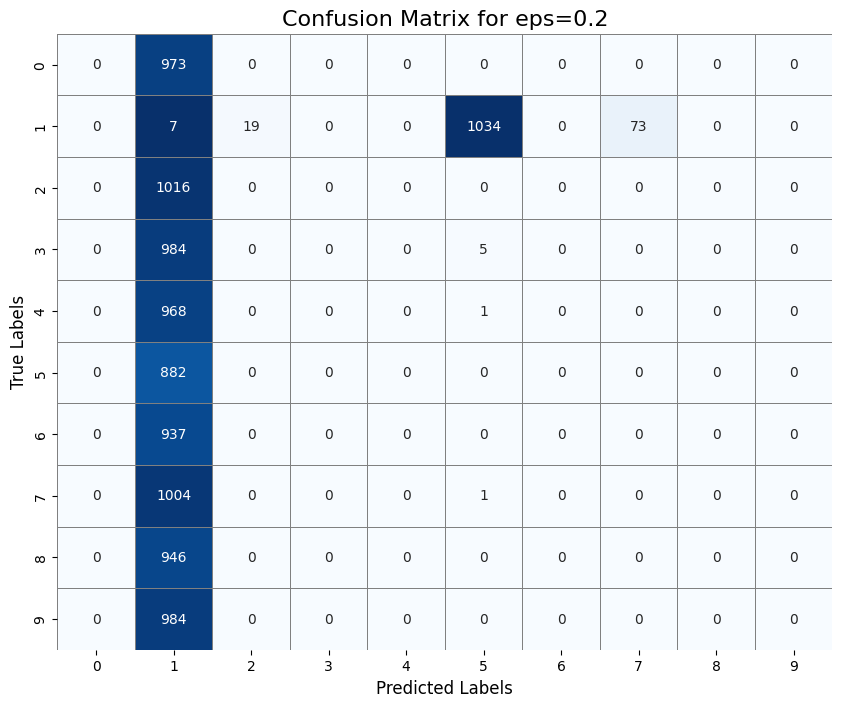

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


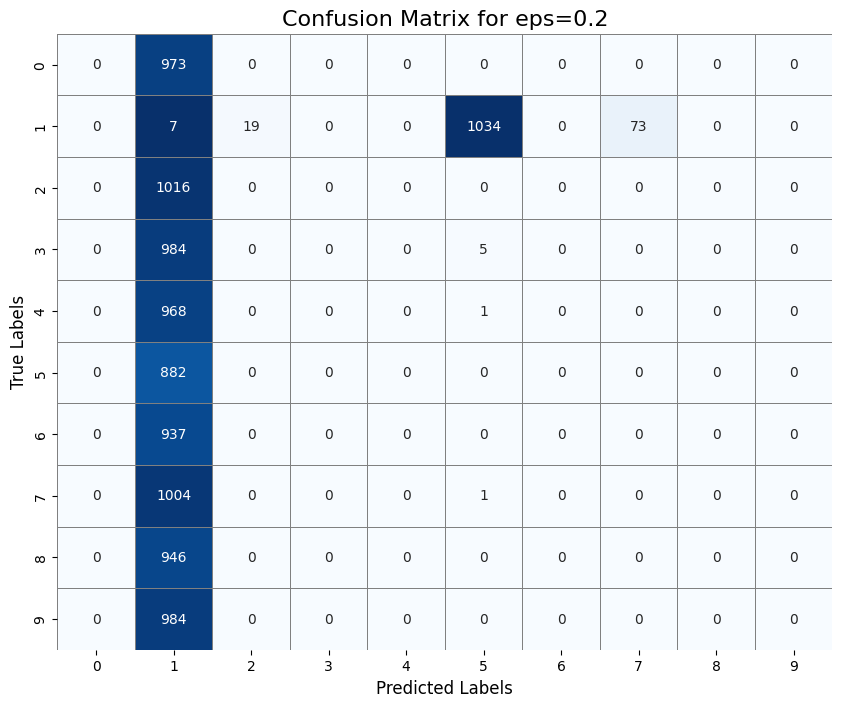

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


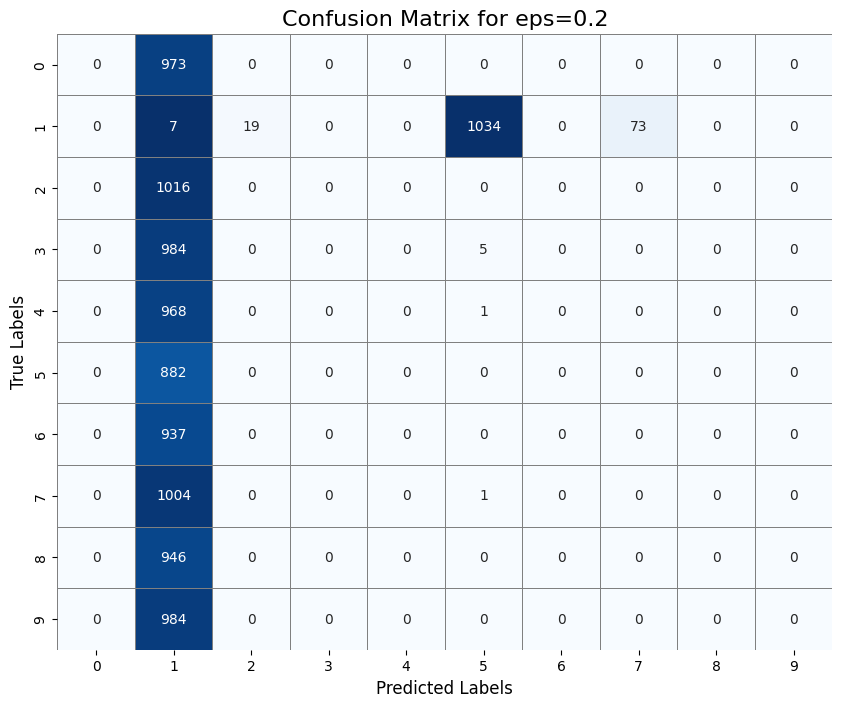

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


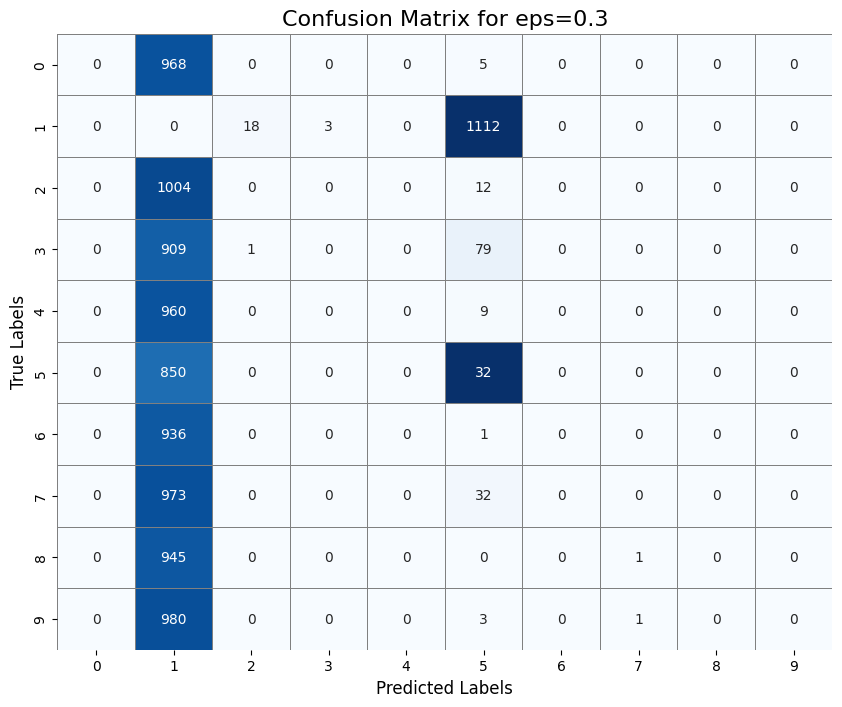

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


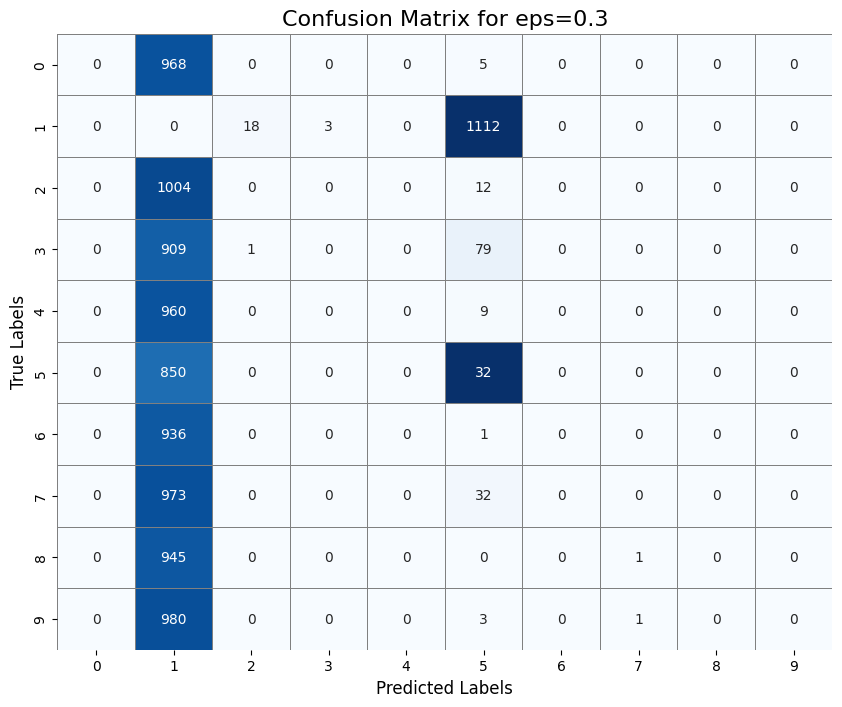

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


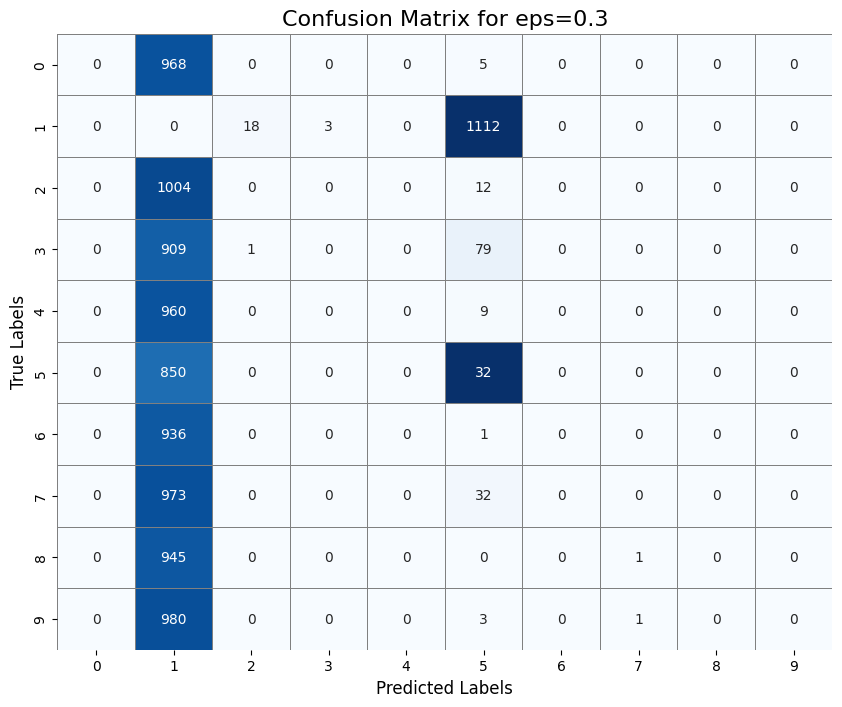

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


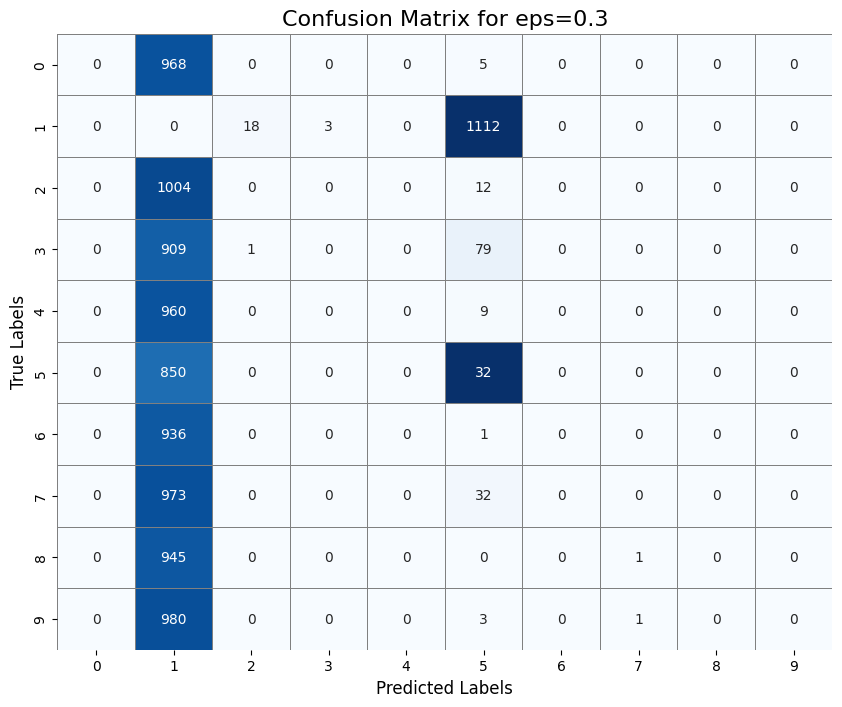

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


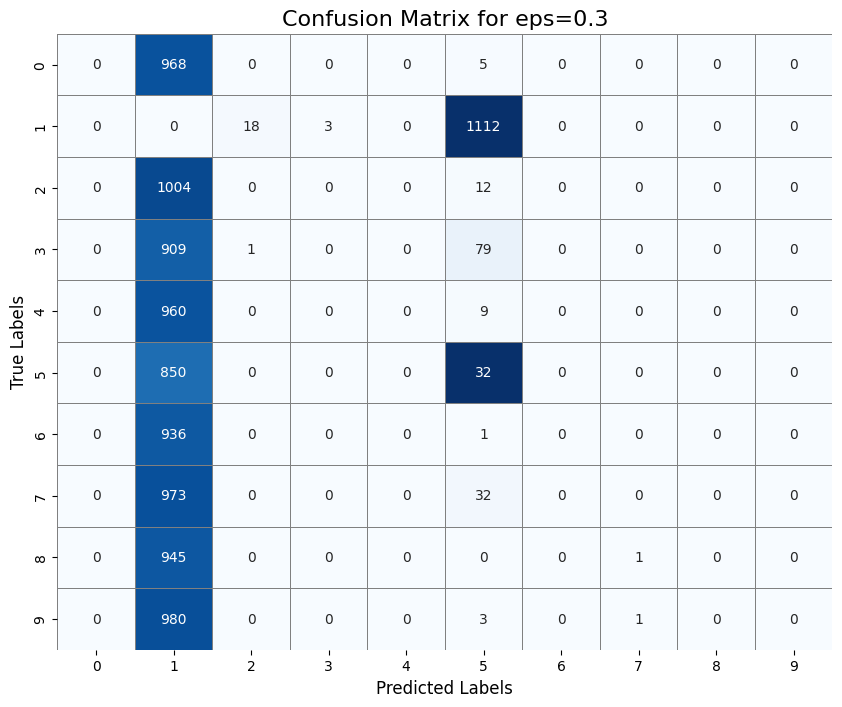

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


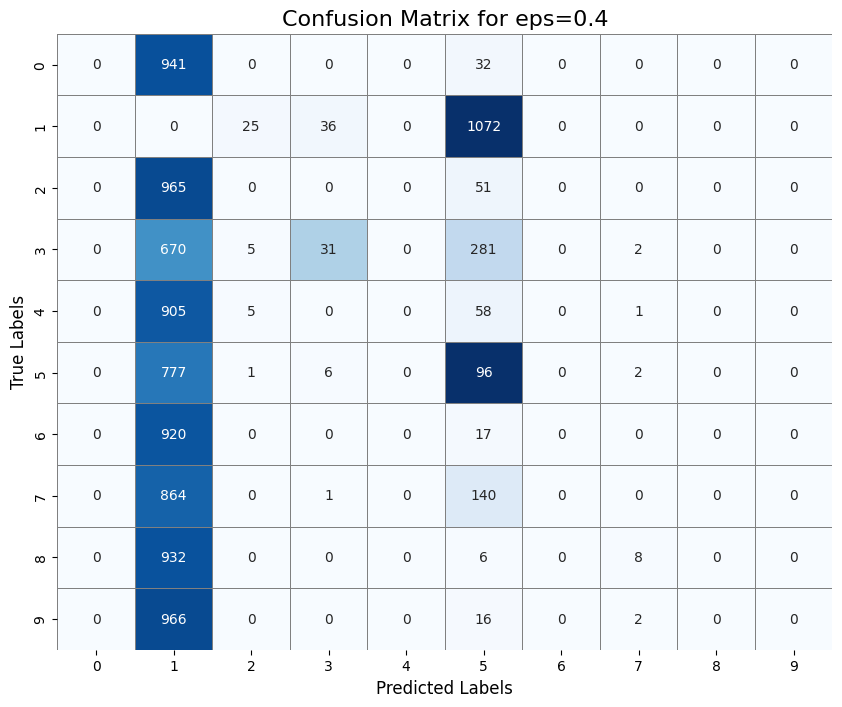

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


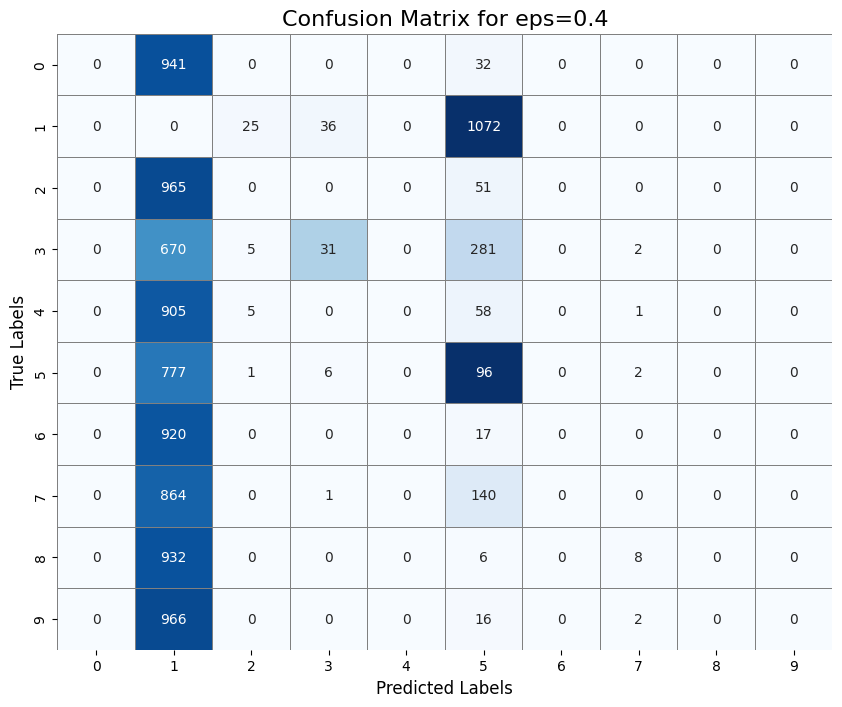

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


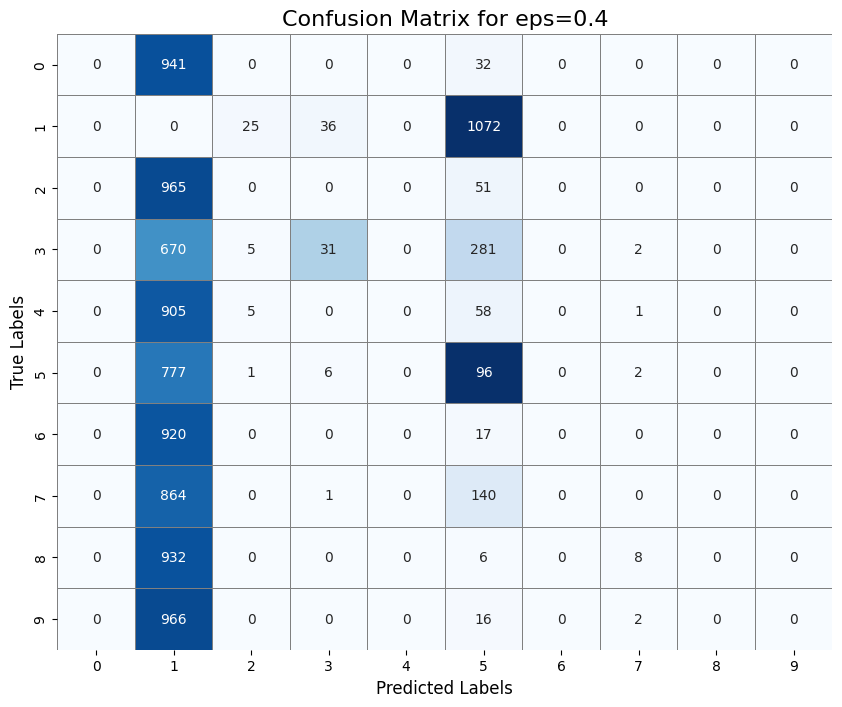

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


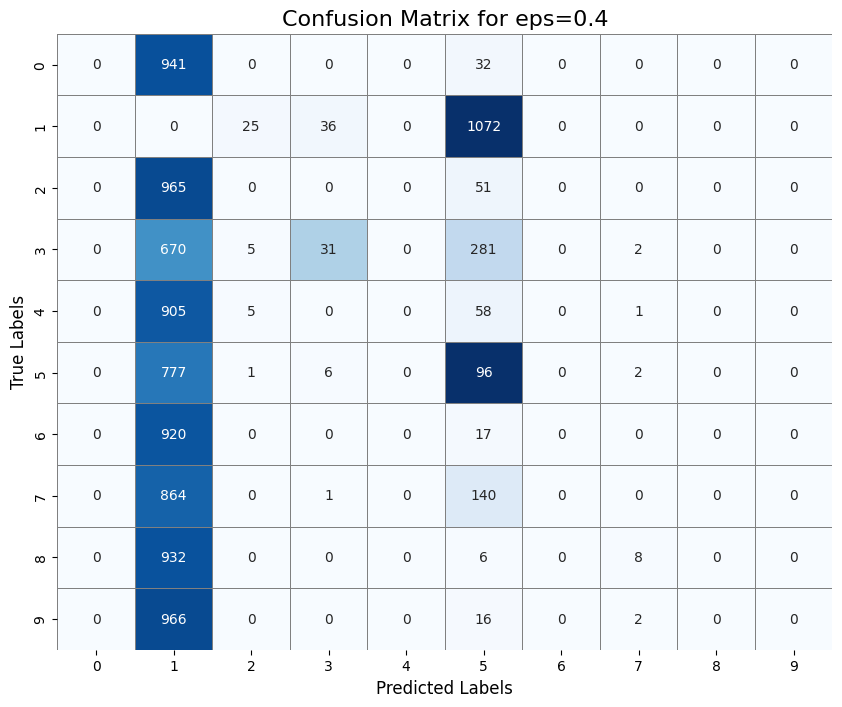

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


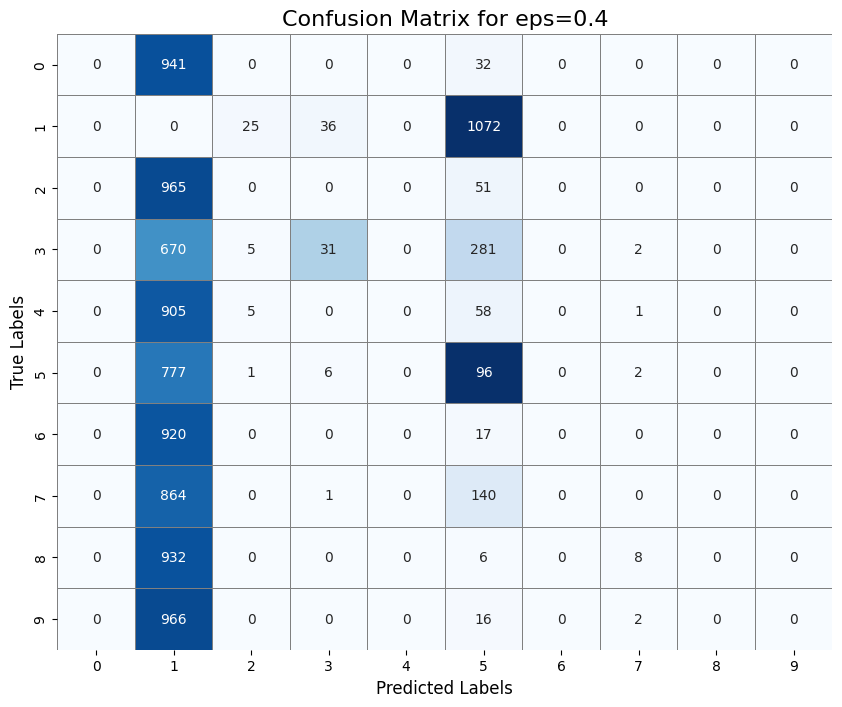

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


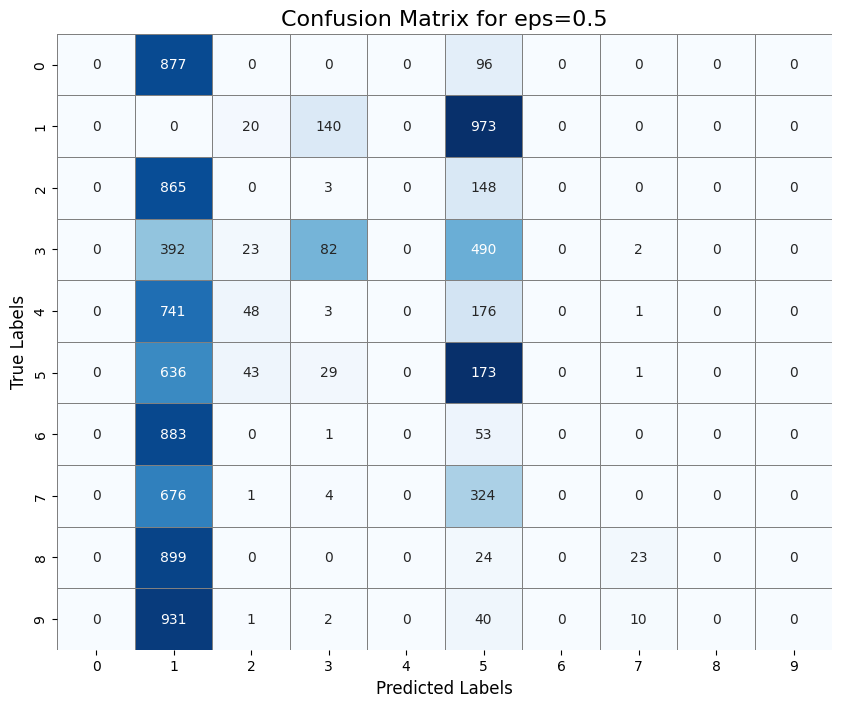

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


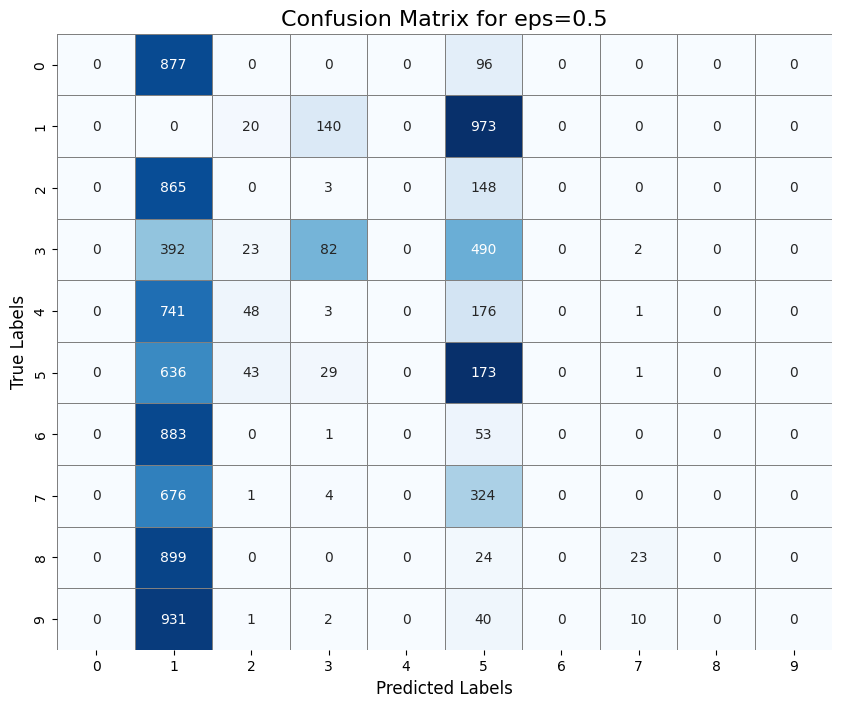

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


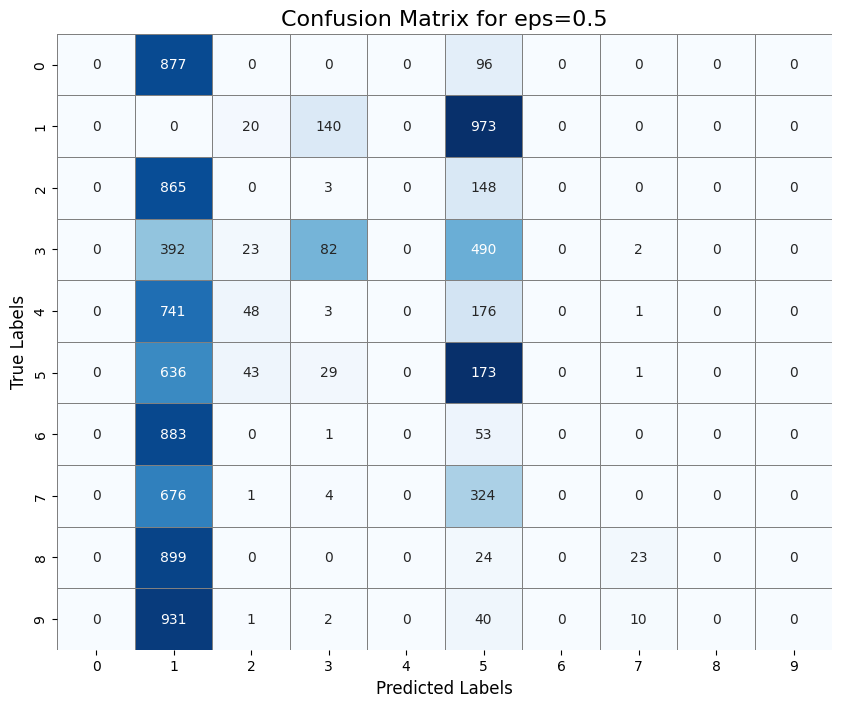

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


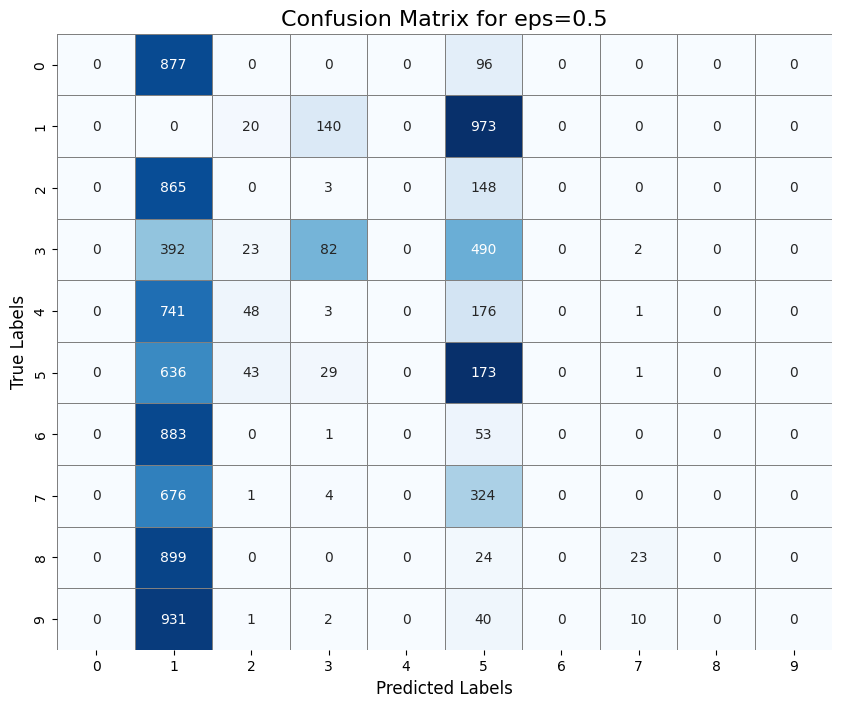

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


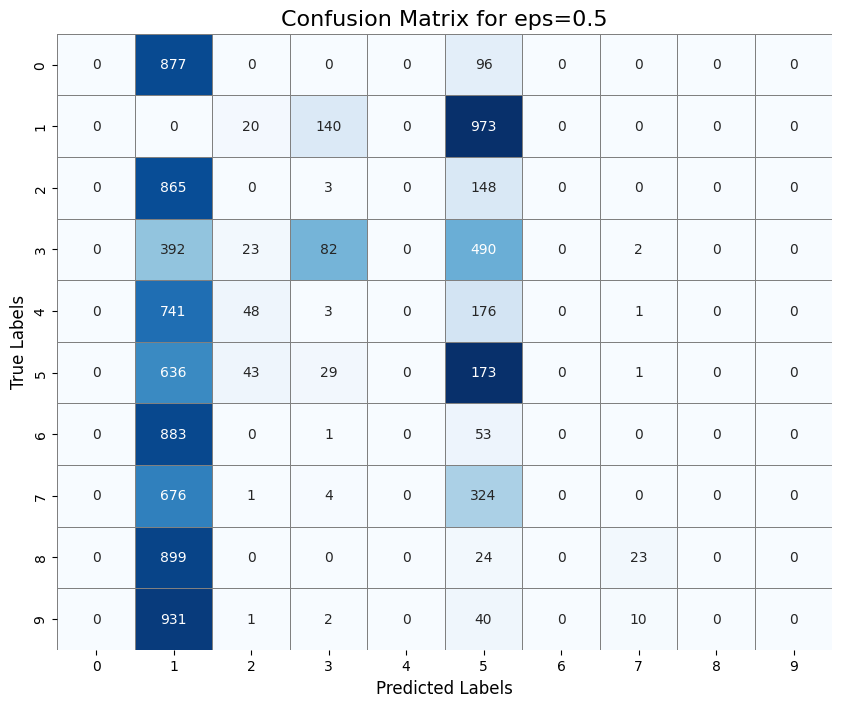

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


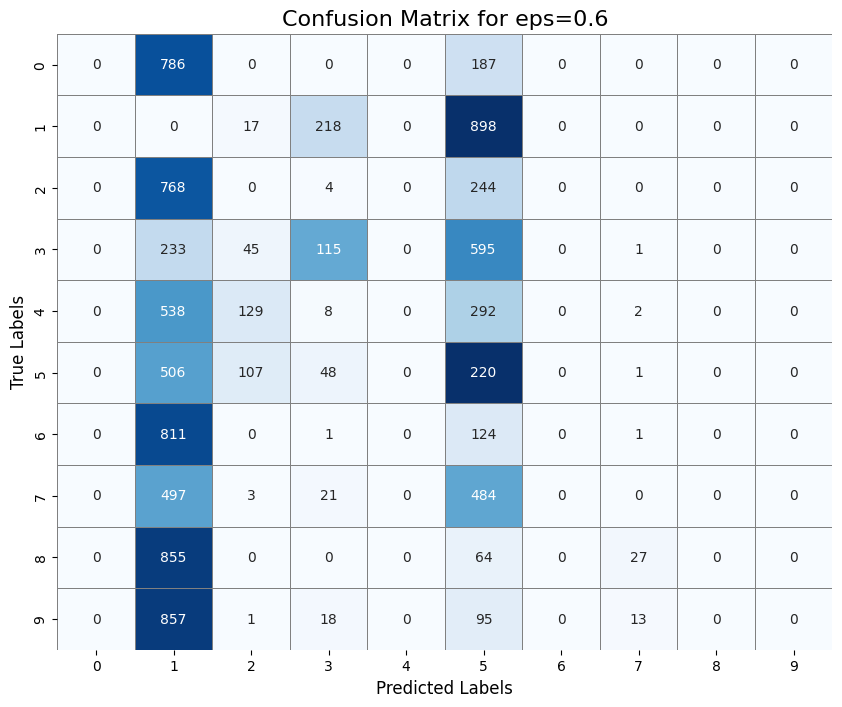

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


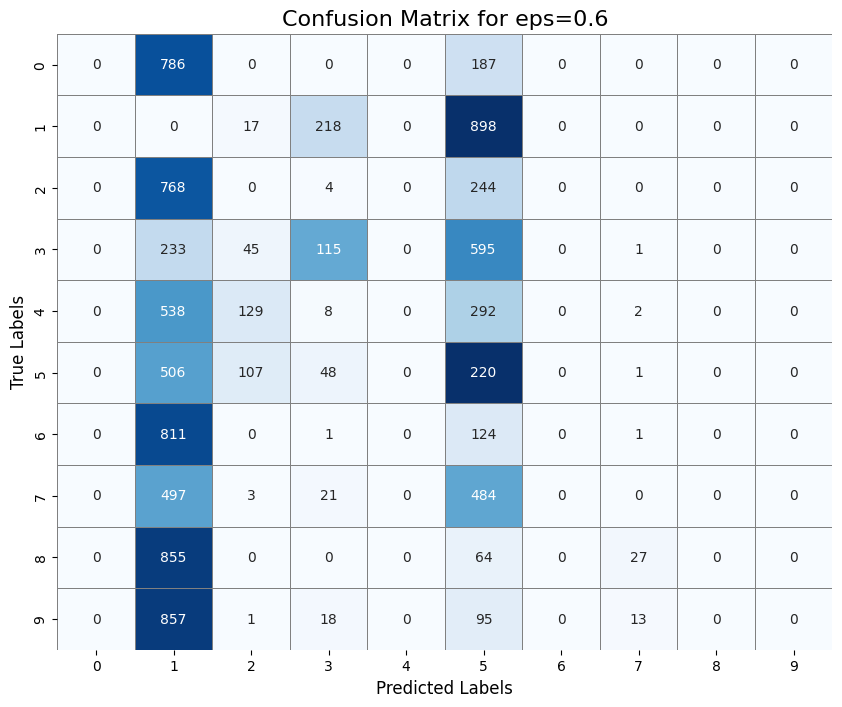

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


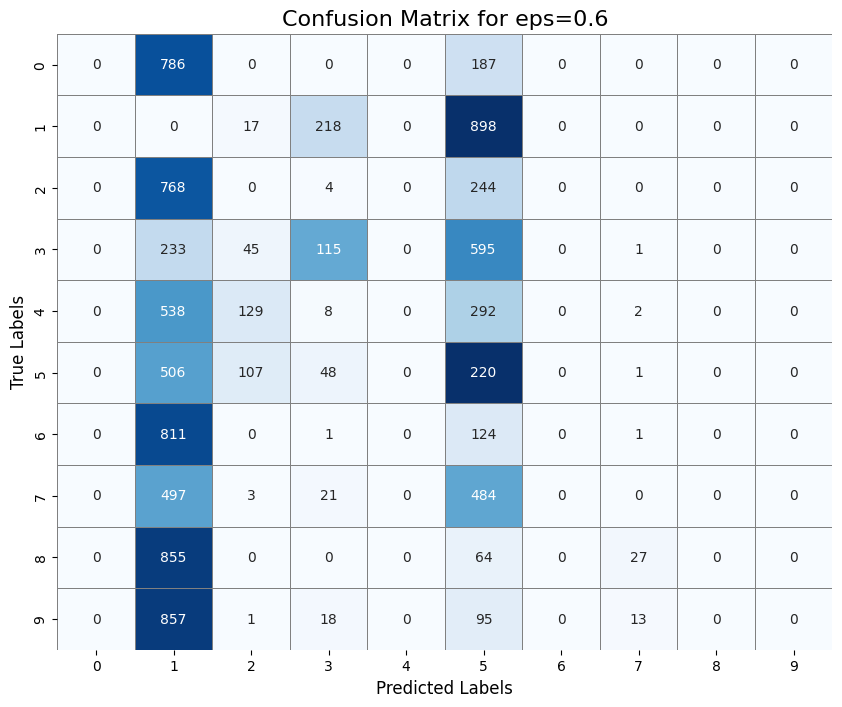

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


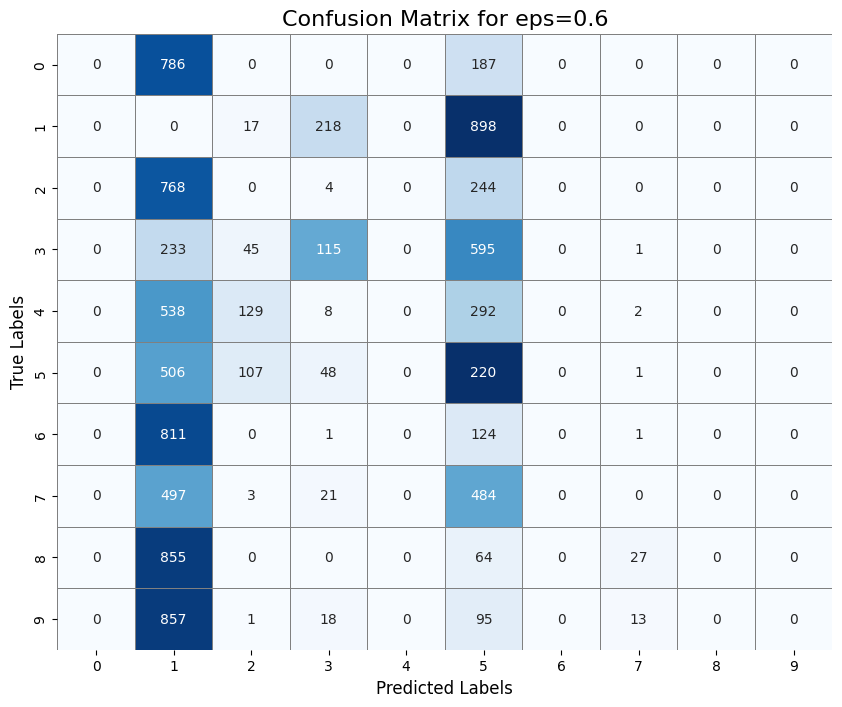

<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


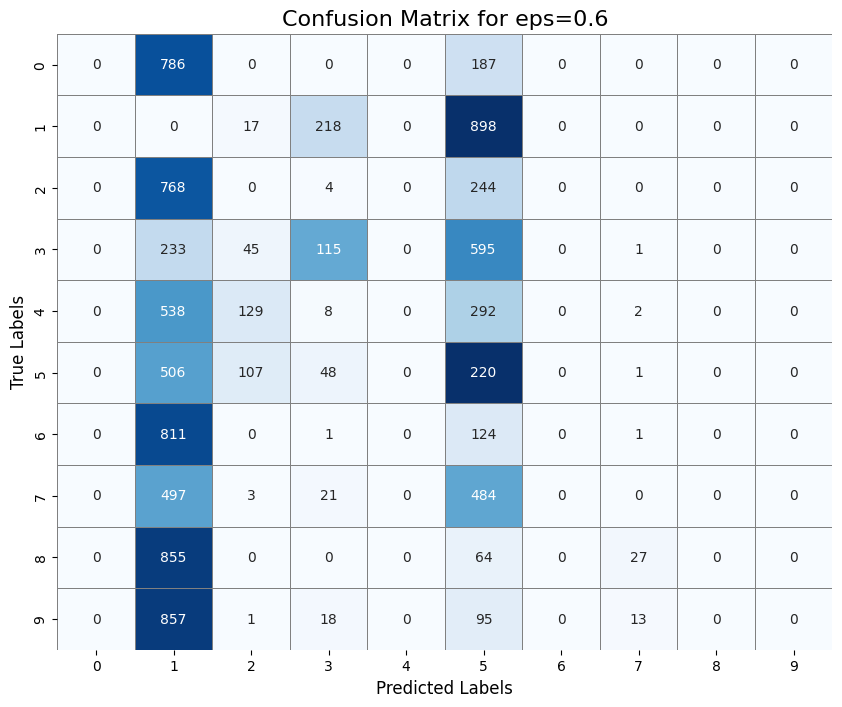

     eps  attack_num  total_correct  total_adv  \
0   0.01           1           9834       9834   
1   0.01           2           9834       9834   
2   0.01           3           9834       9834   
3   0.01           4           9834       9834   
4   0.01           5           9834       9834   
5   0.02           1           9834       9834   
6   0.02           2           9834       9834   
7   0.02           3           9834       9834   
8   0.02           4           9834       9834   
9   0.02           5           9834       9834   
10  0.03           1           9834       9834   
11  0.03           2           9834       9834   
12  0.03           3           9834       9834   
13  0.03           4           9834       9834   
14  0.03           5           9834       9834   
15  0.04           1           9834       9834   
16  0.04           2           9834       9834   
17  0.04           3           9834       9834   
18  0.04           4           9834       9834   


<ipython-input-15-efed1f12d4f7>:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [15]:
# Define the range of eps values
eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize a DataFrame to store results
results_df = pd.DataFrame()

# Loop over the eps values
for eps in eps_range:
    for attack_num in range(1, 6):  # Perform attack 5 times
        # Define the attack with the current eps
        attack = FastGradientMethod(classifier, eps=eps)

        # Apply the attack to generate adversarial examples
        x_adv = attack.generate(x=correct_examples,y=correct_labels)

        # Predict the labels of the adversarial examples
        y_adv = np.argmax(classifier.predict(x_adv), axis=1)

        # Calculate the confusion matrix
        cm = confusion_matrix(correct_labels, y_adv, labels=range(10))
        # Draw and save the confusion matrix
        fig, ax = plt.subplots(figsize=(10, 8))

        # Create a mask for the diagonal elements
        mask = np.eye(len(cm), dtype=bool)

        # Plot the heatmap for off-diagonal elements using the mask
        # Use a professional color palette like 'Blues'
        sns.heatmap(cm, mask=mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Plot the heatmap for diagonal elements using the inverse of the mask
        # Use the same color palette for consistency
        sns.heatmap(cm, mask=~mask, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, linewidths=.5, linecolor='grey')
        # Labels, title and ticks
        label_names = [f'{i}' for i in range(10)]
        ax.set_xlabel('Predicted Labels', fontsize=12)
        ax.set_ylabel('True Labels', fontsize=12)
        ax.set_title(f'Confusion Matrix for eps={eps}', fontsize=16)
        ax.set_xticklabels(label_names)
        ax.set_yticklabels(label_names)
        image_filename = f'target_confusion_matrix_eps_{eps}_attack_{attack_num}.png'
        plt.savefig(image_filename, bbox_inches='tight')
        plt.show()  # Close the figure to avoid displaying it in the notebook

        # Save the results in the DataFrame
        results_df = results_df.append({
            'eps': eps,
            'attack_num': attack_num,
            'total_correct': len(correct_labels),
            'total_adv': len(y_adv),
            'correct_adv_counts': dict(zip(*np.unique(y_adv, return_counts=True)))
        }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv('/content/drive/MyDrive/ColabNotebooks/adv_results.csv', index=False)

# Print the DataFrame
print(results_df)
